# Подготовка данных и основные функции

In [1]:
#python3 -m venv venv && source venv/bin/activate && pip install nbconvert

In [2]:
pip install aim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 132.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.1 MB/s eta 0:00:00
  Created wheel for aim-ui: filename=aim_ui-3.28.0-py3-none-any.whl size=31194920 sha256=57cc79e47ad5967fb1fa1a6d447f91b751708bd5cc8051cfa547a7e050783180
  Stored in direct

In [14]:
pip install seaborn

In [3]:
pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [4]:
pip install torch

In [5]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No CUDA GPU detected")

True
1
Tesla T4


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [7]:
from pathlib import Path

import pandas as pd
import torch
from torch import Tensor

_PERSON_INCOME_MAP = {
    'MORTGAGE': 0,
    'RENT': 1,
    'OWN': 2,
    'OTHER': 3
}

_LOAN_NTENT_MAP = {
    'EDUCATION': 0,
    'MEDICAL': 1,
    'VENTURE': 2,
    'PERSONAL': 3,
    'DEBTCONSOLIDATION': 4,
    'HOMEIMPROVEMENT': 5
}

_LOAN_GRADE_MAP = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6
}

_CB_FILE_MAP = {
    'N': 0,
    'Y': 1
}

class LoanDataset(Dataset):
    def __init__(self, data: pd.DataFrame):
        self._data = data

    def __len__(self):
        return len(self._data)

    def __getitem__(self, item: int) -> dict[str, dict[str | Tensor] | Tensor]:
        item = self._data.iloc[item]
        return {
            'target': torch.scalar_tensor(item['loan_status'], dtype=torch.float32),
            'cat_features': {
                'person_home_ownership': torch.scalar_tensor(_PERSON_INCOME_MAP[item['person_home_ownership']], dtype=torch.long),
                'loan_intent': torch.scalar_tensor(_LOAN_NTENT_MAP[item['loan_intent']], dtype=torch.long),
                'loan_grade': torch.scalar_tensor(_LOAN_GRADE_MAP[item['loan_grade']], dtype=torch.long),
                'cb_person_default_on_file': torch.scalar_tensor(_CB_FILE_MAP[item['cb_person_default_on_file']], dtype=torch.long)
            },
            'numeric_features': {
                'person_age': torch.scalar_tensor(-1 if pd.isna(item['person_age']) else (item['person_age'] / 123), dtype=torch.float32),
                'person_income': torch.scalar_tensor(-1 if pd.isna(item['person_income']) else (item['person_income'] / 1200000), dtype=torch.float32),
                'person_emp_length': torch.scalar_tensor(-1 if pd.isna(item['person_emp_length']) else (item['person_emp_length'] / 123), dtype=torch.float32),
                'loan_amnt': torch.scalar_tensor(-1 if pd.isna(item['loan_amnt']) else (item['loan_amnt'] / 35000), dtype=torch.float32),
                'loan_int_rate': torch.scalar_tensor(-1 if pd.isna(item['loan_int_rate']) else (item['loan_int_rate'] / 23.22), dtype=torch.float32),
                'loan_percent_income': torch.scalar_tensor(-1 if pd.isna(item['loan_percent_income']) else (item['loan_percent_income']), dtype=torch.float32),
                'cb_person_cred_hist_length': torch.scalar_tensor(-1 if pd.isna(item['cb_person_cred_hist_length']) else (item['cb_person_cred_hist_length'] / 30), dtype=torch.float32)
            }
        }


class LoanCollator:
    def __call__(self, items: list[dict[str, dict[str | Tensor] | Tensor]]) -> dict[str, dict[str | Tensor] | Tensor]:
        return {
            'target': torch.stack([x['target'] for x in items]),
            'cat_features': {
                'person_home_ownership': torch.stack([x['cat_features']['person_home_ownership'] for x in items]),
                'loan_intent': torch.stack([x['cat_features']['loan_intent'] for x in items]),
                'loan_grade': torch.stack([x['cat_features']['loan_grade'] for x in items]),
                'cb_person_default_on_file': torch.stack([x['cat_features']['cb_person_default_on_file'] for x in items])
            },
            'numeric_features': {
                'person_age': torch.stack([x['numeric_features']['person_age'] for x in items]),
                'person_income': torch.stack([x['numeric_features']['person_income'] for x in items]),
                'person_emp_length': torch.stack([x['numeric_features']['person_emp_length'] for x in items]),
                'loan_amnt': torch.stack([x['numeric_features']['loan_amnt'] for x in items]),
                'loan_int_rate': torch.stack([x['numeric_features']['loan_int_rate'] for x in items]),
                'loan_percent_income': torch.stack([x['numeric_features']['loan_percent_income'] for x in items]),
                'cb_person_cred_hist_length': torch.stack([x['numeric_features']['cb_person_cred_hist_length'] for x in items])
            }
        }


def load_loandata() -> tuple[LoanDataset, LoanDataset]:
    df_train = pd.read_csv('data/loan_train.csv')
    df_test = pd.read_csv('data/loan_test.csv')
    return LoanDataset(df_train), LoanDataset(df_test)

In [8]:
def _map_to_device(batch: dict, dev: torch.device) -> dict:
    batch['target'] = batch['target'].to(dev)

    batch['cat_features']['person_home_ownership'] = batch['cat_features']['person_home_ownership'].to(dev)
    batch['cat_features']['loan_intent'] = batch['cat_features']['loan_intent'].to(dev)
    batch['cat_features']['loan_grade'] = batch['cat_features']['loan_grade'].to(dev)
    batch['cat_features']['cb_person_default_on_file'] = batch['cat_features']['cb_person_default_on_file'].to(dev)

    batch['numeric_features']['person_age'] = batch['numeric_features']['person_age'].to(dev)
    batch['numeric_features']['person_income'] = batch['numeric_features']['person_income'].to(dev)
    batch['numeric_features']['person_emp_length'] = batch['numeric_features']['person_emp_length'].to(dev)
    batch['numeric_features']['loan_amnt'] = batch['numeric_features']['loan_amnt'].to(dev)
    batch['numeric_features']['loan_int_rate'] = batch['numeric_features']['loan_int_rate'].to(dev)
    batch['numeric_features']['loan_percent_income'] = batch['numeric_features']['loan_percent_income'].to(dev)
    batch['numeric_features']['cb_person_cred_hist_length'] = batch['numeric_features']['cb_person_cred_hist_length'].to(dev)


In [9]:
import torch
from torch.nn import BCEWithLogitsLoss
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchmetrics import MeanMetric, AUROC
from tqdm import tqdm
from aim import Run

def train(train_dataset, eval_dataset, model_name,
          base_hidden_size, n_epochs, base_dropout_p=0.0,
          base_weight_decay=0.01, base_lr=0.01):

    train_losses = []
    eval_losses = []
    train_roc_auc_values = []
    eval_roc_auc_values = []

    dev = torch.device('cuda:0')
    lr = base_lr
    batch_size = 32
    seed = 42
    weight_decay = base_weight_decay
    max_grad_norm = 1.0  # Gradient clipping threshold
    patience = 5  # Early stopping patience
    min_delta = 0.001  # Minimum change in validation loss to be considered as improvement

    torch.random.manual_seed(seed)

    loss_bce = BCEWithLogitsLoss()

    collator = LoanCollator()
    model = model_name(hidden_size=base_hidden_size, dropout_p=base_dropout_p).to(dev)
    optimizer = SGD(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Add learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=2, verbose=True
    )

    run = Run(experiment='123')
    run["hparams"] = {
        "learning_rate": lr,
        "base_hidden_size": base_hidden_size,
        "batch_size": batch_size,
        'weight_decay': weight_decay,
        'max_grad_norm': max_grad_norm,
        'patience': patience,
        'min_delta': min_delta
    }

    train_dl = DataLoader(train_dataset, batch_size=batch_size, num_workers=8, collate_fn=collator, pin_memory=True)
    eval_dl = DataLoader(eval_dataset, batch_size=batch_size, num_workers=8, collate_fn=collator, pin_memory=True)

    best_eval_loss = float('inf')
    best_model_state = None
    patience_counter = 0

    for i_epoch in tqdm(range(n_epochs)):
        # Training phase
        model.train()
        train_loss = MeanMetric().to(dev)
        train_rocauc = AUROC(task='binary').to(dev)

        for i, batch in enumerate(train_dl):
            _map_to_device(batch, dev)

            result = model(cat_features=batch['cat_features'], numeric_features=batch['numeric_features'])
            loss_value = loss_bce(result, batch['target'])

            optimizer.zero_grad()
            loss_value.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)

            optimizer.step()

            train_loss.update(loss_value)
            train_rocauc.update(torch.sigmoid(result), batch['target'])

        train_loss_value = train_loss.compute().item()
        train_rocauc_value = train_rocauc.compute().item()
        train_losses.append(train_loss_value)
        train_roc_auc_values.append(train_rocauc_value)
        run.track(train_loss_value, name='loss/train', step=i_epoch)
        run.track(train_rocauc_value, name='roc-auc/train', step=i_epoch)

        # Evaluation phase
        model.eval()
        eval_loss = MeanMetric().to(dev)
        eval_rocauc = AUROC(task='binary').to(dev)

        with torch.no_grad():
            for batch_eval in eval_dl:
                _map_to_device(batch_eval, dev)

                result_eval = model(cat_features=batch_eval['cat_features'], numeric_features=batch_eval['numeric_features'])
                eval_loss_value = loss_bce(result_eval, batch_eval['target'])

                eval_loss.update(eval_loss_value)
                eval_rocauc.update(torch.sigmoid(result_eval), batch_eval['target'])

        eval_loss_value = eval_loss.compute().item()
        eval_rocauc_value = eval_rocauc.compute().item()
        eval_losses.append(eval_loss_value)
        eval_roc_auc_values.append(eval_rocauc_value)
        run.track(eval_loss_value, name='loss/eval', step=i_epoch)
        run.track(eval_rocauc_value, name='roc-auc/eval', step=i_epoch)

        # Learning rate scheduling
        scheduler.step(eval_loss_value)

        # Early stopping and model checkpointing
        if eval_loss_value < best_eval_loss - min_delta:
            best_eval_loss = eval_loss_value
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping triggered after {i_epoch + 1} epochs')
            break

        print(f'Epoch {i_epoch+1}/{n_epochs}, Train Loss: {train_loss_value:.4f}, Test Loss: {eval_loss_value:.4f}, '
              f'Train ROC-AUC: {train_rocauc_value:.4f}, Test ROC-AUC: {eval_rocauc_value:.4f}')

    # Restore best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    return {'train_losses': train_losses,
            'eval_losses': eval_losses,
            'train_roc_auc_values': train_roc_auc_values,
            'eval_roc_auc_values': eval_roc_auc_values}

In [17]:
import matplotlib.pyplot as plt

def func_subplots(dict):
    train_losses = dict['train_losses']
    eval_losses = dict['eval_losses']
    train_roc_auc_values = dict['train_roc_auc_values']
    eval_roc_auc_values = dict['eval_roc_auc_values']

    # Set style for better-looking plots
    plt.style.use('seaborn-v0_8-whitegrid')

    # Create figure with a larger size and better spacing
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Training Progress', fontsize=16, y=1.05)

    # Plot loss curves
    axs[0].plot(range(1, len(train_losses) + 1), train_losses,
                label='Train Loss', color='#2ecc71', marker='o',
                linestyle='-', linewidth=2, markersize=6)
    axs[0].plot(range(1, len(eval_losses) + 1), eval_losses,
                label='Eval Loss', color='#e74c3c', marker='s',
                linestyle='-', linewidth=2, markersize=6)
    axs[0].set_title('Loss Curves', fontsize=14, pad=15)
    axs[0].set_xlabel('Epochs', fontsize=12)
    axs[0].set_ylabel('Loss Value', fontsize=12)
    axs[0].legend(fontsize=10)
    axs[0].grid(True, linestyle='--', alpha=0.7)
    axs[0].set_facecolor('#f8f9fa')

    # Plot ROC-AUC curves
    axs[1].plot(range(1, len(train_roc_auc_values) + 1), train_roc_auc_values,
                label='Train ROC-AUC', color='#3498db', marker='o',
                linestyle='-', linewidth=2, markersize=6)
    axs[1].plot(range(1, len(eval_roc_auc_values) + 1), eval_roc_auc_values,
                label='Eval ROC-AUC', color='#9b59b6', marker='s',
                linestyle='-', linewidth=2, markersize=6)
    axs[1].set_title('ROC-AUC Curves', fontsize=14, pad=15)
    axs[1].set_xlabel('Epochs', fontsize=12)
    axs[1].set_ylabel('ROC-AUC Score', fontsize=12)
    axs[1].legend(fontsize=10)
    axs[1].grid(True, linestyle='--', alpha=0.7)
    axs[1].set_facecolor('#f8f9fa')

    # Adjust layout
    plt.tight_layout()

    # Add a light gray background to the entire figure
    fig.patch.set_facecolor('#f8f9fa')

# Эксперимент 1. Простая модель

In [11]:
class FirstModel(nn.Module):
    def __init__(self, hidden_size=32, dropout_p=0.0):
        super().__init__()

        self.emb_person_home_ownership = nn.Embedding(4, embedding_dim=hidden_size)
        self.emb_loan_intent = nn.Embedding(6, embedding_dim=hidden_size)
        self.emb_loan_grade = nn.Embedding(7, embedding_dim=hidden_size)
        self.emb_cb_person_default_on_file = nn.Embedding(2, embedding_dim=hidden_size)

        self.numeric_linear = nn.Linear(7, hidden_size)

        self.block = nn.Sequential(
            nn.Linear(hidden_size, hidden_size*4),
            nn.ReLU(),
            nn.Linear(hidden_size*4, hidden_size)
        )

        self.linear_out = nn.Linear(hidden_size, 1)

    def forward(self, cat_features: dict[str, Tensor], numeric_features: dict[str, Tensor]) -> Tensor:
        x_person_home_ownership = self.emb_person_home_ownership(cat_features['person_home_ownership'])
        x_loan_intent = self.emb_loan_intent(cat_features['loan_intent'])
        x_loan_grade = self.emb_loan_grade(cat_features['loan_grade'])
        x_cb_person_default_on_file = self.emb_cb_person_default_on_file(cat_features['cb_person_default_on_file'])

        stacked_numeric = torch.stack([numeric_features['person_age'],
                                       numeric_features['person_income'],
                                       numeric_features['person_emp_length'],
                                       numeric_features['loan_amnt'],
                                       numeric_features['loan_int_rate'],
                                       numeric_features['loan_percent_income'],
                                       numeric_features['cb_person_cred_hist_length']
                                       ], dim=-1)

        x_numeric = self.numeric_linear(stacked_numeric)
        x = x_person_home_ownership + x_loan_intent + x_loan_grade + x_cb_person_default_on_file + x_numeric

        x = self.block(x)
        x = self.linear_out(x)
        return x.squeeze(-1)



In [12]:
train_ds_1, test_ds_1 = load_loandata()
dict_sub_1 = train(train_ds_1, test_ds_1,
                 model_name = FirstModel,
                 base_hidden_size = 32,
                 n_epochs = 20)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
  5%|▌         | 1/20 [00:23<07:26, 23.51s/it]

Epoch 1/20, Train Loss: 0.3179, Test Loss: 0.2922, Train ROC-AUC: 0.8119, Test ROC-AUC: 0.8473


 10%|█         | 2/20 [00:47<07:12, 24.01s/it]

Epoch 2/20, Train Loss: 0.2918, Test Loss: 0.2853, Train ROC-AUC: 0.8417, Test ROC-AUC: 0.8557


 15%|█▌        | 3/20 [01:10<06:40, 23.59s/it]

Epoch 3/20, Train Loss: 0.2865, Test Loss: 0.2809, Train ROC-AUC: 0.8507, Test ROC-AUC: 0.8637


 20%|██        | 4/20 [01:38<06:44, 25.30s/it]

Epoch 4/20, Train Loss: 0.2823, Test Loss: 0.2769, Train ROC-AUC: 0.8585, Test ROC-AUC: 0.8709


 25%|██▌       | 5/20 [02:02<06:12, 24.83s/it]

Epoch 5/20, Train Loss: 0.2783, Test Loss: 0.2726, Train ROC-AUC: 0.8659, Test ROC-AUC: 0.8780


 30%|███       | 6/20 [02:26<05:41, 24.37s/it]

Epoch 6/20, Train Loss: 0.2741, Test Loss: 0.2680, Train ROC-AUC: 0.8731, Test ROC-AUC: 0.8847


 35%|███▌      | 7/20 [02:50<05:16, 24.35s/it]

Epoch 7/20, Train Loss: 0.2697, Test Loss: 0.2634, Train ROC-AUC: 0.8792, Test ROC-AUC: 0.8899


 40%|████      | 8/20 [03:16<04:57, 24.80s/it]

Epoch 8/20, Train Loss: 0.2656, Test Loss: 0.2590, Train ROC-AUC: 0.8837, Test ROC-AUC: 0.8939


 45%|████▌     | 9/20 [03:40<04:30, 24.56s/it]

Epoch 9/20, Train Loss: 0.2616, Test Loss: 0.2550, Train ROC-AUC: 0.8872, Test ROC-AUC: 0.8969


 50%|█████     | 10/20 [04:04<04:03, 24.39s/it]

Epoch 10/20, Train Loss: 0.2583, Test Loss: 0.2516, Train ROC-AUC: 0.8896, Test ROC-AUC: 0.8992


 55%|█████▌    | 11/20 [04:28<03:38, 24.24s/it]

Epoch 11/20, Train Loss: 0.2555, Test Loss: 0.2490, Train ROC-AUC: 0.8916, Test ROC-AUC: 0.9010


 60%|██████    | 12/20 [04:52<03:14, 24.28s/it]

Epoch 12/20, Train Loss: 0.2532, Test Loss: 0.2468, Train ROC-AUC: 0.8930, Test ROC-AUC: 0.9024


 65%|██████▌   | 13/20 [05:16<02:49, 24.21s/it]

Epoch 13/20, Train Loss: 0.2513, Test Loss: 0.2449, Train ROC-AUC: 0.8942, Test ROC-AUC: 0.9035


 70%|███████   | 14/20 [05:40<02:25, 24.18s/it]

Epoch 14/20, Train Loss: 0.2499, Test Loss: 0.2436, Train ROC-AUC: 0.8950, Test ROC-AUC: 0.9044


 75%|███████▌  | 15/20 [06:04<02:00, 24.12s/it]

Epoch 15/20, Train Loss: 0.2488, Test Loss: 0.2427, Train ROC-AUC: 0.8956, Test ROC-AUC: 0.9049


 80%|████████  | 16/20 [06:28<01:36, 24.03s/it]

Epoch 16/20, Train Loss: 0.2481, Test Loss: 0.2421, Train ROC-AUC: 0.8959, Test ROC-AUC: 0.9054


 85%|████████▌ | 17/20 [06:51<01:11, 23.80s/it]

Epoch 17/20, Train Loss: 0.2477, Test Loss: 0.2417, Train ROC-AUC: 0.8961, Test ROC-AUC: 0.9057


 90%|█████████ | 18/20 [07:24<00:52, 26.30s/it]

Epoch 18/20, Train Loss: 0.2475, Test Loss: 0.2415, Train ROC-AUC: 0.8962, Test ROC-AUC: 0.9058


 95%|█████████▌| 19/20 [07:48<00:25, 25.80s/it]

Epoch 19/20, Train Loss: 0.2474, Test Loss: 0.2415, Train ROC-AUC: 0.8962, Test ROC-AUC: 0.9058


100%|██████████| 20/20 [08:14<00:00, 24.72s/it]

Epoch 20/20, Train Loss: 0.2475, Test Loss: 0.2415, Train ROC-AUC: 0.8961, Test ROC-AUC: 0.9058


OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

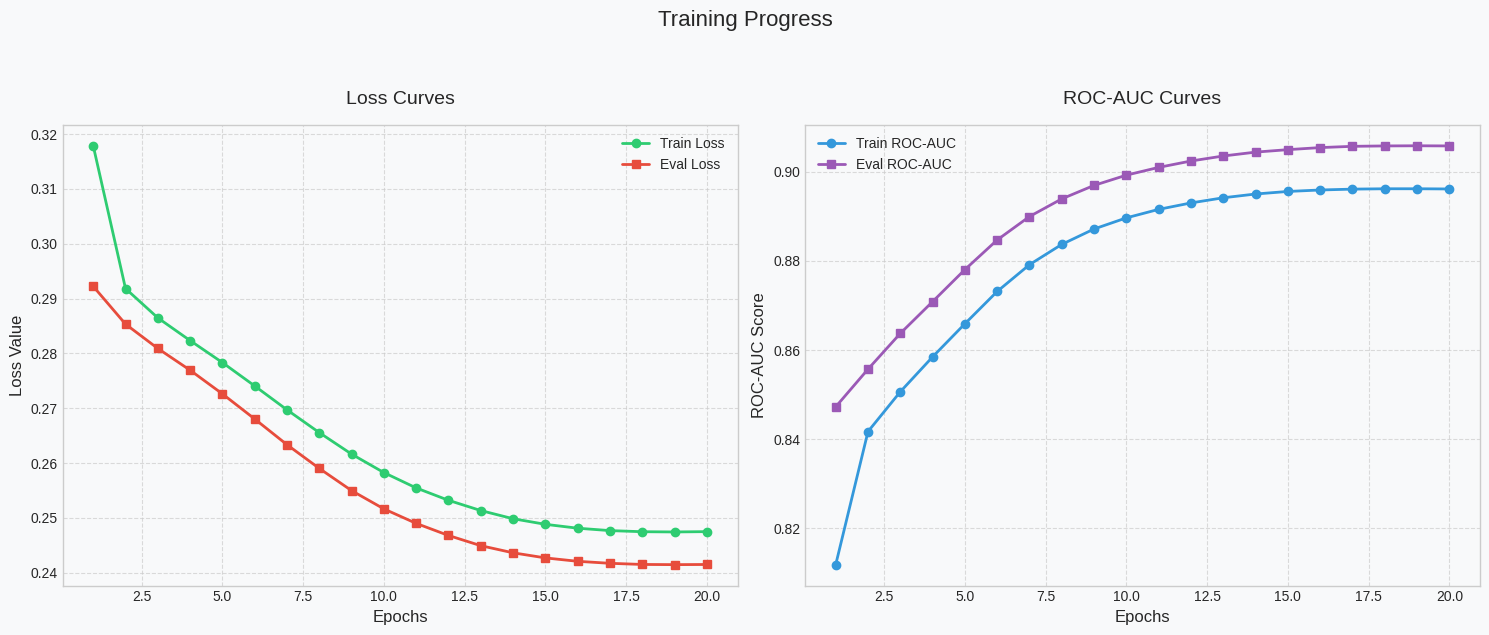

In [18]:
func_subplots(dict_sub_1)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
  6%|▌         | 1/18 [00:24<06:50, 24.17s/it]

Epoch 1/18, Train Loss: 0.3179, Test Loss: 0.2922, Train ROC-AUC: 0.8119, Test ROC-AUC: 0.8473


 11%|█         | 2/18 [00:48<06:29, 24.35s/it]

Epoch 2/18, Train Loss: 0.2918, Test Loss: 0.2853, Train ROC-AUC: 0.8417, Test ROC-AUC: 0.8557


 17%|█▋        | 3/18 [01:12<06:04, 24.29s/it]

Epoch 3/18, Train Loss: 0.2865, Test Loss: 0.2809, Train ROC-AUC: 0.8507, Test ROC-AUC: 0.8637


 22%|██▏       | 4/18 [01:37<05:40, 24.32s/it]

Epoch 4/18, Train Loss: 0.2823, Test Loss: 0.2769, Train ROC-AUC: 0.8585, Test ROC-AUC: 0.8709


 28%|██▊       | 5/18 [02:01<05:15, 24.24s/it]

Epoch 5/18, Train Loss: 0.2783, Test Loss: 0.2726, Train ROC-AUC: 0.8659, Test ROC-AUC: 0.8780


 33%|███▎      | 6/18 [02:25<04:50, 24.18s/it]

Epoch 6/18, Train Loss: 0.2741, Test Loss: 0.2680, Train ROC-AUC: 0.8731, Test ROC-AUC: 0.8847


 39%|███▉      | 7/18 [02:49<04:25, 24.13s/it]

Epoch 7/18, Train Loss: 0.2697, Test Loss: 0.2634, Train ROC-AUC: 0.8792, Test ROC-AUC: 0.8899


 44%|████▍     | 8/18 [03:13<04:01, 24.16s/it]

Epoch 8/18, Train Loss: 0.2656, Test Loss: 0.2590, Train ROC-AUC: 0.8837, Test ROC-AUC: 0.8939


 50%|█████     | 9/18 [03:37<03:36, 24.11s/it]

Epoch 9/18, Train Loss: 0.2616, Test Loss: 0.2550, Train ROC-AUC: 0.8872, Test ROC-AUC: 0.8969


 56%|█████▌    | 10/18 [04:01<03:12, 24.05s/it]

Epoch 10/18, Train Loss: 0.2583, Test Loss: 0.2516, Train ROC-AUC: 0.8896, Test ROC-AUC: 0.8992


 61%|██████    | 11/18 [04:25<02:48, 24.09s/it]

Epoch 11/18, Train Loss: 0.2555, Test Loss: 0.2490, Train ROC-AUC: 0.8916, Test ROC-AUC: 0.9010


 67%|██████▋   | 12/18 [04:49<02:23, 23.94s/it]

Epoch 12/18, Train Loss: 0.2532, Test Loss: 0.2468, Train ROC-AUC: 0.8930, Test ROC-AUC: 0.9024


 72%|███████▏  | 13/18 [05:13<01:59, 23.95s/it]

Epoch 13/18, Train Loss: 0.2513, Test Loss: 0.2449, Train ROC-AUC: 0.8942, Test ROC-AUC: 0.9035


 78%|███████▊  | 14/18 [05:37<01:36, 24.01s/it]

Epoch 14/18, Train Loss: 0.2499, Test Loss: 0.2436, Train ROC-AUC: 0.8950, Test ROC-AUC: 0.9044


 83%|████████▎ | 15/18 [06:02<01:12, 24.18s/it]

Epoch 15/18, Train Loss: 0.2488, Test Loss: 0.2427, Train ROC-AUC: 0.8956, Test ROC-AUC: 0.9049


 89%|████████▉ | 16/18 [06:26<00:48, 24.26s/it]

Epoch 16/18, Train Loss: 0.2481, Test Loss: 0.2421, Train ROC-AUC: 0.8959, Test ROC-AUC: 0.9054


 94%|█████████▍| 17/18 [06:50<00:24, 24.30s/it]

Epoch 17/18, Train Loss: 0.2477, Test Loss: 0.2417, Train ROC-AUC: 0.8961, Test ROC-AUC: 0.9057


100%|██████████| 18/18 [07:15<00:00, 24.18s/it]

Epoch 18/18, Train Loss: 0.2475, Test Loss: 0.2415, Train ROC-AUC: 0.8962, Test ROC-AUC: 0.9058


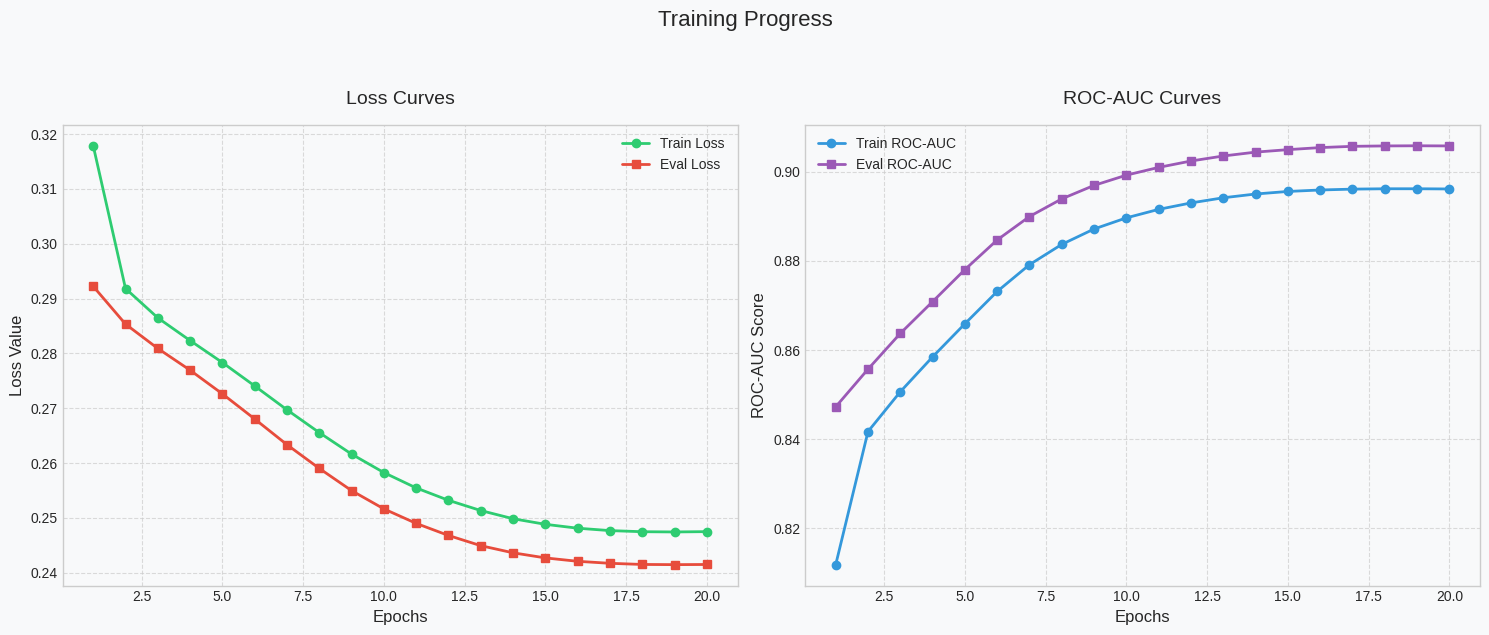

In [19]:
train_ds_1_18, test_ds_1_18 = load_loandata()
dict_sub_1_18 = train(train_ds_1_18, test_ds_1_18,
                 model_name = FirstModel,
                 base_hidden_size = 32,
                 n_epochs = 18)
func_subplots(dict_sub_1)

# Эксперимент 2. Модель побольше

In [20]:
class SecondBaseBlock(nn.Module):
    def __init__(self, hidden_size=128):
        super().__init__()
        self.fc1 = nn.Linear(hidden_size, hidden_size*4)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size*4, hidden_size)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

class SecondModel(nn.Module):
    def __init__(self, hidden_size=128, dropout_p=0.0):
        super().__init__()

        self.emb_person_home_ownership = nn.Embedding(4, embedding_dim=hidden_size)
        self.emb_loan_intent = nn.Embedding(6, embedding_dim=hidden_size)
        self.emb_loan_grade = nn.Embedding(7, embedding_dim=hidden_size)
        self.emb_cb_person_default_on_file = nn.Embedding(2, embedding_dim=hidden_size)

        self.numeric_linear = nn.Linear(7, hidden_size)

        self.block1 = SecondBaseBlock(hidden_size)
        self.block2 = SecondBaseBlock(hidden_size)
        self.block3 = SecondBaseBlock(hidden_size)

        self.linear_out = nn.Linear(hidden_size, 1)

    def forward(self, cat_features: dict[str, Tensor], numeric_features: dict[str, Tensor]) -> Tensor:
        x_person_home_ownership = self.emb_person_home_ownership(cat_features['person_home_ownership'])
        x_loan_intent = self.emb_loan_intent(cat_features['loan_intent'])
        x_loan_grade = self.emb_loan_grade(cat_features['loan_grade'])
        x_cb_person_default_on_file = self.emb_cb_person_default_on_file(cat_features['cb_person_default_on_file'])

        stacked_numeric = torch.stack([numeric_features['person_age'],
                                       numeric_features['person_income'],
                                       numeric_features['person_emp_length'],
                                       numeric_features['loan_amnt'],
                                       numeric_features['loan_int_rate'],
                                       numeric_features['loan_percent_income'],
                                       numeric_features['cb_person_cred_hist_length']
                                       ], dim=-1)

        x_numeric = self.numeric_linear(stacked_numeric)
        x = x_person_home_ownership + x_loan_intent + x_loan_grade + x_cb_person_default_on_file + x_numeric

        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)

        x = self.linear_out(x)
        return x.squeeze(-1)



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
 10%|█         | 1/10 [00:25<03:51, 25.75s/it]

Epoch 1/10, Train Loss: 0.3415, Test Loss: 0.3016, Train ROC-AUC: 0.7828, Test ROC-AUC: 0.8424


 20%|██        | 2/10 [00:51<03:25, 25.66s/it]

Epoch 2/10, Train Loss: 0.2991, Test Loss: 0.2910, Train ROC-AUC: 0.8349, Test ROC-AUC: 0.8528


 30%|███       | 3/10 [01:17<03:00, 25.75s/it]

Epoch 3/10, Train Loss: 0.2908, Test Loss: 0.2851, Train ROC-AUC: 0.8456, Test ROC-AUC: 0.8637


 40%|████      | 4/10 [01:42<02:34, 25.76s/it]

Epoch 4/10, Train Loss: 0.2845, Test Loss: 0.2795, Train ROC-AUC: 0.8572, Test ROC-AUC: 0.8769


 50%|█████     | 5/10 [02:08<02:09, 25.85s/it]

Epoch 5/10, Train Loss: 0.2775, Test Loss: 0.2726, Train ROC-AUC: 0.8691, Test ROC-AUC: 0.8887


 60%|██████    | 6/10 [02:40<01:50, 27.72s/it]

Epoch 6/10, Train Loss: 0.2693, Test Loss: 0.2639, Train ROC-AUC: 0.8792, Test ROC-AUC: 0.8962


 70%|███████   | 7/10 [03:06<01:21, 27.22s/it]

Epoch 7/10, Train Loss: 0.2604, Test Loss: 0.2552, Train ROC-AUC: 0.8865, Test ROC-AUC: 0.9010


 80%|████████  | 8/10 [03:32<00:53, 26.84s/it]

Epoch 8/10, Train Loss: 0.2523, Test Loss: 0.2468, Train ROC-AUC: 0.8917, Test ROC-AUC: 0.9053


 90%|█████████ | 9/10 [03:58<00:26, 26.54s/it]

Epoch 9/10, Train Loss: 0.2449, Test Loss: 0.2391, Train ROC-AUC: 0.8962, Test ROC-AUC: 0.9092


100%|██████████| 10/10 [04:24<00:00, 26.47s/it]

Epoch 10/10, Train Loss: 0.2386, Test Loss: 0.2328, Train ROC-AUC: 0.9002, Test ROC-AUC: 0.9128


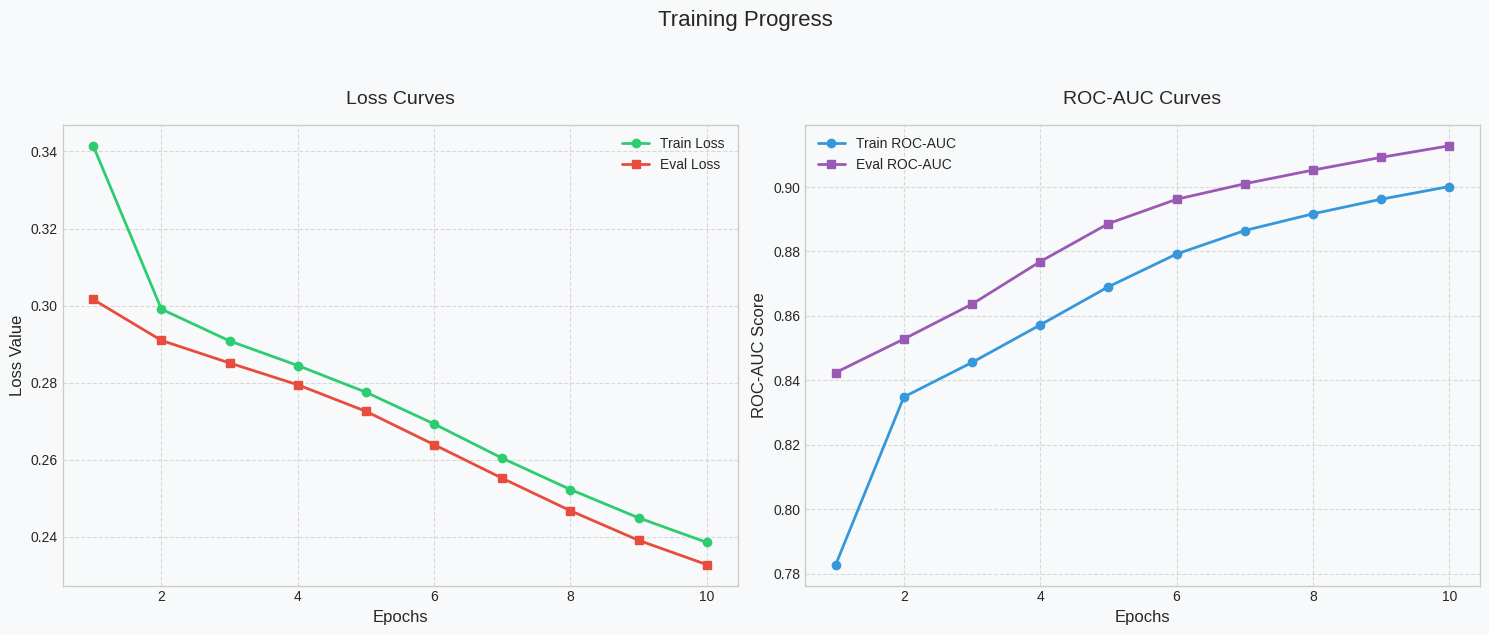

In [21]:
train_ds_2, test_ds_2 = load_loandata()
dict_sub_2 = train(train_ds_2, test_ds_2,
                 model_name = SecondModel,
                 base_hidden_size = 128,
                 n_epochs = 10)
func_subplots(dict_sub_2)

# Эксперимент 3. Skip Connections, Batch Norms

In [22]:
class ThirdBaseBlock(nn.Module):
    def __init__(self, hidden_size=128):
        super().__init__()
        self.bn = nn.BatchNorm1d(hidden_size)
        self.fc1 = nn.Linear(hidden_size, hidden_size*4)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size*4, hidden_size)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x_skip = x
        x = self.bn(x) # Batch Norms
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x + x_skip # Skip Connections

class ThirdModel(nn.Module):
    def __init__(self, hidden_size=128, dropout_p=0.0) :
        super().__init__()

        self.emb_person_home_ownership = nn.Embedding(4, embedding_dim=hidden_size)
        self.emb_loan_intent = nn.Embedding(6, embedding_dim=hidden_size)
        self.emb_loan_grade = nn.Embedding(7, embedding_dim=hidden_size)
        self.emb_cb_person_default_on_file = nn.Embedding(2, embedding_dim=hidden_size)

        self.numeric_linear = nn.Linear(7, hidden_size)

        self.block1 = ThirdBaseBlock(hidden_size)
        self.block2 = ThirdBaseBlock(hidden_size)
        self.block3 = ThirdBaseBlock(hidden_size)

        self.linear_out = nn.Linear(hidden_size, 1)

    def forward(self, cat_features: dict[str, Tensor], numeric_features: dict[str, Tensor]) -> Tensor:
        x_person_home_ownership = self.emb_person_home_ownership(cat_features['person_home_ownership'])
        x_loan_intent = self.emb_loan_intent(cat_features['loan_intent'])
        x_loan_grade = self.emb_loan_grade(cat_features['loan_grade'])
        x_cb_person_default_on_file = self.emb_cb_person_default_on_file(cat_features['cb_person_default_on_file'])

        stacked_numeric = torch.stack([numeric_features['person_age'],
                                       numeric_features['person_income'],
                                       numeric_features['person_emp_length'],
                                       numeric_features['loan_amnt'],
                                       numeric_features['loan_int_rate'],
                                       numeric_features['loan_percent_income'],
                                       numeric_features['cb_person_cred_hist_length']
                                       ], dim=-1)

        x_numeric = self.numeric_linear(stacked_numeric)
        x = x_person_home_ownership + x_loan_intent + x_loan_grade + x_cb_person_default_on_file + x_numeric

        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)

        x = self.linear_out(x)
        return x.squeeze(-1)



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
 10%|█         | 1/10 [00:27<04:08, 27.65s/it]

Epoch 1/10, Train Loss: 0.2983, Test Loss: 0.2818, Train ROC-AUC: 0.8308, Test ROC-AUC: 0.8633


 20%|██        | 2/10 [00:55<03:41, 27.64s/it]

Epoch 2/10, Train Loss: 0.2817, Test Loss: 0.2738, Train ROC-AUC: 0.8562, Test ROC-AUC: 0.8778


 30%|███       | 3/10 [01:23<03:16, 28.08s/it]

Epoch 3/10, Train Loss: 0.2751, Test Loss: 0.2688, Train ROC-AUC: 0.8680, Test ROC-AUC: 0.8854


 40%|████      | 4/10 [01:51<02:47, 27.93s/it]

Epoch 4/10, Train Loss: 0.2707, Test Loss: 0.2648, Train ROC-AUC: 0.8752, Test ROC-AUC: 0.8900


 50%|█████     | 5/10 [02:19<02:19, 27.93s/it]

Epoch 5/10, Train Loss: 0.2671, Test Loss: 0.2610, Train ROC-AUC: 0.8803, Test ROC-AUC: 0.8936


 60%|██████    | 6/10 [02:47<01:51, 27.85s/it]

Epoch 6/10, Train Loss: 0.2635, Test Loss: 0.2570, Train ROC-AUC: 0.8845, Test ROC-AUC: 0.8968


 70%|███████   | 7/10 [03:14<01:23, 27.71s/it]

Epoch 7/10, Train Loss: 0.2594, Test Loss: 0.2519, Train ROC-AUC: 0.8883, Test ROC-AUC: 0.9002


 80%|████████  | 8/10 [03:42<00:55, 27.78s/it]

Epoch 8/10, Train Loss: 0.2541, Test Loss: 0.2450, Train ROC-AUC: 0.8920, Test ROC-AUC: 0.9043


 90%|█████████ | 9/10 [04:10<00:27, 27.69s/it]

Epoch 9/10, Train Loss: 0.2465, Test Loss: 0.2346, Train ROC-AUC: 0.8963, Test ROC-AUC: 0.9099


100%|██████████| 10/10 [04:37<00:00, 27.74s/it]

Epoch 10/10, Train Loss: 0.2350, Test Loss: 0.2195, Train ROC-AUC: 0.9025, Test ROC-AUC: 0.9176


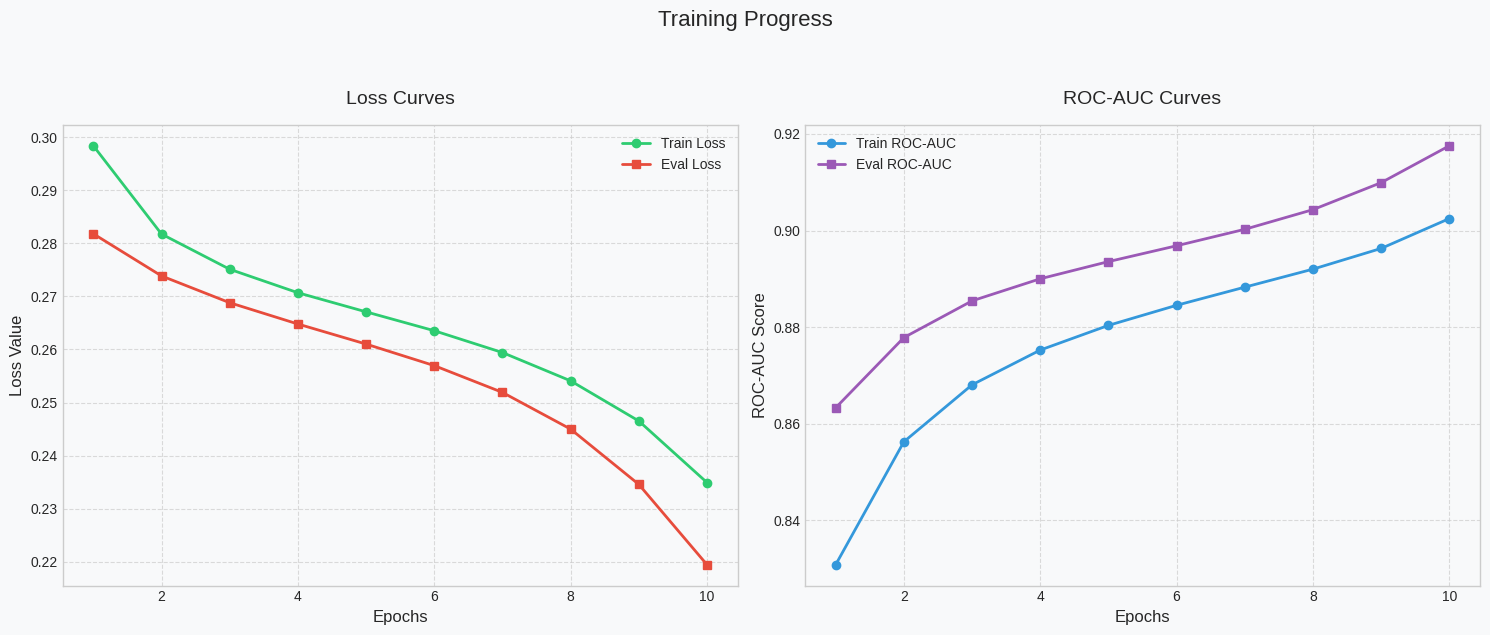

In [23]:
train_ds_3, test_ds_3 = load_loandata()
dict_sub_3 = train(train_ds_3, test_ds_3,
                 model_name = ThirdModel,
                 base_hidden_size = 128,
                 n_epochs = 10)
func_subplots(dict_sub_3)

# Эксперимент 4. Dropout

In [24]:
class FourthBaseBlock(nn.Module):
    def __init__(self, hidden_size=128, dropout_p=0.0):
        super().__init__()
        self.bn = nn.BatchNorm1d(hidden_size)
        self.fc1 = nn.Linear(hidden_size, hidden_size*4)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_p)
        self.fc2 = nn.Linear(hidden_size*4, hidden_size)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x_skip = x
        x = self.bn(x) # Batch Norms
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x + x_skip # Skip Connections

class FourthModel(nn.Module):
    def __init__(self, hidden_size=128, dropout_p=0.0):
        super().__init__()

        self.emb_person_home_ownership = nn.Embedding(4, embedding_dim=hidden_size)
        self.emb_loan_intent = nn.Embedding(6, embedding_dim=hidden_size)
        self.emb_loan_grade = nn.Embedding(7, embedding_dim=hidden_size)
        self.emb_cb_person_default_on_file = nn.Embedding(2, embedding_dim=hidden_size)

        self.numeric_linear = nn.Linear(7, hidden_size)

        self.block1 = FourthBaseBlock(hidden_size, dropout_p)
        self.block2 = FourthBaseBlock(hidden_size, dropout_p)
        self.block3 = FourthBaseBlock(hidden_size, dropout_p)

        self.linear_out = nn.Linear(hidden_size, 1)

    def forward(self, cat_features: dict[str, Tensor], numeric_features: dict[str, Tensor]) -> Tensor:
        x_person_home_ownership = self.emb_person_home_ownership(cat_features['person_home_ownership'])
        x_loan_intent = self.emb_loan_intent(cat_features['loan_intent'])
        x_loan_grade = self.emb_loan_grade(cat_features['loan_grade'])
        x_cb_person_default_on_file = self.emb_cb_person_default_on_file(cat_features['cb_person_default_on_file'])

        stacked_numeric = torch.stack([numeric_features['person_age'],
                                       numeric_features['person_income'],
                                       numeric_features['person_emp_length'],
                                       numeric_features['loan_amnt'],
                                       numeric_features['loan_int_rate'],
                                       numeric_features['loan_percent_income'],
                                       numeric_features['cb_person_cred_hist_length']
                                       ], dim=-1)

        x_numeric = self.numeric_linear(stacked_numeric)
        x = x_person_home_ownership + x_loan_intent + x_loan_grade + x_cb_person_default_on_file + x_numeric

        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)

        x = self.linear_out(x)
        return x.squeeze(-1)



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
 10%|█         | 1/10 [00:27<04:10, 27.84s/it]

Epoch 1/10, Train Loss: 0.2984, Test Loss: 0.2818, Train ROC-AUC: 0.8307, Test ROC-AUC: 0.8632


 20%|██        | 2/10 [00:55<03:42, 27.82s/it]

Epoch 2/10, Train Loss: 0.2818, Test Loss: 0.2739, Train ROC-AUC: 0.8562, Test ROC-AUC: 0.8777


 30%|███       | 3/10 [01:23<03:15, 27.91s/it]

Epoch 3/10, Train Loss: 0.2752, Test Loss: 0.2689, Train ROC-AUC: 0.8679, Test ROC-AUC: 0.8854


 40%|████      | 4/10 [01:51<02:48, 28.01s/it]

Epoch 4/10, Train Loss: 0.2707, Test Loss: 0.2649, Train ROC-AUC: 0.8752, Test ROC-AUC: 0.8899


 50%|█████     | 5/10 [02:19<02:19, 27.97s/it]

Epoch 5/10, Train Loss: 0.2672, Test Loss: 0.2611, Train ROC-AUC: 0.8802, Test ROC-AUC: 0.8935


 60%|██████    | 6/10 [02:47<01:51, 28.00s/it]

Epoch 6/10, Train Loss: 0.2637, Test Loss: 0.2571, Train ROC-AUC: 0.8844, Test ROC-AUC: 0.8967


 70%|███████   | 7/10 [03:15<01:23, 27.89s/it]

Epoch 7/10, Train Loss: 0.2595, Test Loss: 0.2520, Train ROC-AUC: 0.8882, Test ROC-AUC: 0.9002


 80%|████████  | 8/10 [03:44<00:56, 28.14s/it]

Epoch 8/10, Train Loss: 0.2542, Test Loss: 0.2452, Train ROC-AUC: 0.8919, Test ROC-AUC: 0.9042


 90%|█████████ | 9/10 [04:11<00:27, 27.96s/it]

Epoch 9/10, Train Loss: 0.2467, Test Loss: 0.2348, Train ROC-AUC: 0.8962, Test ROC-AUC: 0.9098


100%|██████████| 10/10 [04:39<00:00, 27.94s/it]

Epoch 10/10, Train Loss: 0.2352, Test Loss: 0.2196, Train ROC-AUC: 0.9023, Test ROC-AUC: 0.9175



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
 10%|█         | 1/10 [00:27<04:08, 27.67s/it]

Epoch 1/10, Train Loss: 0.2989, Test Loss: 0.2820, Train ROC-AUC: 0.8299, Test ROC-AUC: 0.8625


 20%|██        | 2/10 [01:00<04:07, 30.97s/it]

Epoch 2/10, Train Loss: 0.2823, Test Loss: 0.2743, Train ROC-AUC: 0.8555, Test ROC-AUC: 0.8770


 30%|███       | 3/10 [01:29<03:28, 29.72s/it]

Epoch 3/10, Train Loss: 0.2757, Test Loss: 0.2693, Train ROC-AUC: 0.8669, Test ROC-AUC: 0.8846


 40%|████      | 4/10 [01:57<02:55, 29.19s/it]

Epoch 4/10, Train Loss: 0.2713, Test Loss: 0.2654, Train ROC-AUC: 0.8742, Test ROC-AUC: 0.8892


 50%|█████     | 5/10 [02:26<02:25, 29.10s/it]

Epoch 5/10, Train Loss: 0.2679, Test Loss: 0.2618, Train ROC-AUC: 0.8794, Test ROC-AUC: 0.8929


 60%|██████    | 6/10 [02:55<01:55, 28.91s/it]

Epoch 6/10, Train Loss: 0.2645, Test Loss: 0.2578, Train ROC-AUC: 0.8835, Test ROC-AUC: 0.8961


 70%|███████   | 7/10 [03:23<01:25, 28.66s/it]

Epoch 7/10, Train Loss: 0.2605, Test Loss: 0.2530, Train ROC-AUC: 0.8873, Test ROC-AUC: 0.8995


 80%|████████  | 8/10 [03:51<00:57, 28.59s/it]

Epoch 8/10, Train Loss: 0.2552, Test Loss: 0.2464, Train ROC-AUC: 0.8913, Test ROC-AUC: 0.9035


 90%|█████████ | 9/10 [04:20<00:28, 28.77s/it]

Epoch 9/10, Train Loss: 0.2482, Test Loss: 0.2365, Train ROC-AUC: 0.8953, Test ROC-AUC: 0.9088


100%|██████████| 10/10 [04:49<00:00, 28.97s/it]

Epoch 10/10, Train Loss: 0.2369, Test Loss: 0.2208, Train ROC-AUC: 0.9014, Test ROC-AUC: 0.9170



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
 10%|█         | 1/10 [00:28<04:12, 28.03s/it]

Epoch 1/10, Train Loss: 0.2994, Test Loss: 0.2823, Train ROC-AUC: 0.8292, Test ROC-AUC: 0.8617


 20%|██        | 2/10 [00:55<03:43, 27.96s/it]

Epoch 2/10, Train Loss: 0.2830, Test Loss: 0.2748, Train ROC-AUC: 0.8542, Test ROC-AUC: 0.8760


 30%|███       | 3/10 [01:24<03:17, 28.17s/it]

Epoch 3/10, Train Loss: 0.2766, Test Loss: 0.2699, Train ROC-AUC: 0.8654, Test ROC-AUC: 0.8835


 40%|████      | 4/10 [01:52<02:48, 28.14s/it]

Epoch 4/10, Train Loss: 0.2723, Test Loss: 0.2662, Train ROC-AUC: 0.8726, Test ROC-AUC: 0.8883


 50%|█████     | 5/10 [02:20<02:21, 28.20s/it]

Epoch 5/10, Train Loss: 0.2689, Test Loss: 0.2626, Train ROC-AUC: 0.8781, Test ROC-AUC: 0.8919


 60%|██████    | 6/10 [02:48<01:52, 28.10s/it]

Epoch 6/10, Train Loss: 0.2655, Test Loss: 0.2588, Train ROC-AUC: 0.8822, Test ROC-AUC: 0.8952


 70%|███████   | 7/10 [03:17<01:24, 28.18s/it]

Epoch 7/10, Train Loss: 0.2617, Test Loss: 0.2542, Train ROC-AUC: 0.8863, Test ROC-AUC: 0.8987


 80%|████████  | 8/10 [03:46<00:56, 28.48s/it]

Epoch 8/10, Train Loss: 0.2566, Test Loss: 0.2479, Train ROC-AUC: 0.8903, Test ROC-AUC: 0.9026


 90%|█████████ | 9/10 [04:14<00:28, 28.48s/it]

Epoch 9/10, Train Loss: 0.2497, Test Loss: 0.2382, Train ROC-AUC: 0.8944, Test ROC-AUC: 0.9078


100%|██████████| 10/10 [04:42<00:00, 28.23s/it]

Epoch 10/10, Train Loss: 0.2385, Test Loss: 0.2219, Train ROC-AUC: 0.9004, Test ROC-AUC: 0.9164



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
 10%|█         | 1/10 [00:28<04:15, 28.39s/it]

Epoch 1/10, Train Loss: 0.3022, Test Loss: 0.2842, Train ROC-AUC: 0.8255, Test ROC-AUC: 0.8575


 20%|██        | 2/10 [00:56<03:43, 27.93s/it]

Epoch 2/10, Train Loss: 0.2865, Test Loss: 0.2774, Train ROC-AUC: 0.8485, Test ROC-AUC: 0.8705


 30%|███       | 3/10 [01:23<03:14, 27.74s/it]

Epoch 3/10, Train Loss: 0.2805, Test Loss: 0.2727, Train ROC-AUC: 0.8586, Test ROC-AUC: 0.8782


 40%|████      | 4/10 [01:51<02:46, 27.76s/it]

Epoch 4/10, Train Loss: 0.2763, Test Loss: 0.2696, Train ROC-AUC: 0.8665, Test ROC-AUC: 0.8833


 50%|█████     | 5/10 [02:19<02:19, 27.97s/it]

Epoch 5/10, Train Loss: 0.2732, Test Loss: 0.2665, Train ROC-AUC: 0.8723, Test ROC-AUC: 0.8871


 60%|██████    | 6/10 [02:46<01:50, 27.74s/it]

Epoch 6/10, Train Loss: 0.2704, Test Loss: 0.2636, Train ROC-AUC: 0.8765, Test ROC-AUC: 0.8906


 70%|███████   | 7/10 [03:14<01:22, 27.63s/it]

Epoch 7/10, Train Loss: 0.2672, Test Loss: 0.2601, Train ROC-AUC: 0.8809, Test ROC-AUC: 0.8942


 80%|████████  | 8/10 [03:41<00:55, 27.55s/it]

Epoch 8/10, Train Loss: 0.2631, Test Loss: 0.2553, Train ROC-AUC: 0.8853, Test ROC-AUC: 0.8978


 90%|█████████ | 9/10 [04:09<00:27, 27.49s/it]

Epoch 9/10, Train Loss: 0.2582, Test Loss: 0.2484, Train ROC-AUC: 0.8889, Test ROC-AUC: 0.9021


100%|██████████| 10/10 [04:37<00:00, 27.75s/it]

Epoch 10/10, Train Loss: 0.2500, Test Loss: 0.2355, Train ROC-AUC: 0.8940, Test ROC-AUC: 0.9090



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
 10%|█         | 1/10 [00:30<04:32, 30.27s/it]

Epoch 1/10, Train Loss: 0.3190, Test Loss: 0.2918, Train ROC-AUC: 0.8039, Test ROC-AUC: 0.8447


 20%|██        | 2/10 [00:57<03:50, 28.77s/it]

Epoch 2/10, Train Loss: 0.2989, Test Loss: 0.2877, Train ROC-AUC: 0.8302, Test ROC-AUC: 0.8511


 30%|███       | 3/10 [01:26<03:21, 28.73s/it]

Epoch 3/10, Train Loss: 0.2934, Test Loss: 0.2845, Train ROC-AUC: 0.8380, Test ROC-AUC: 0.8568


 40%|████      | 4/10 [01:54<02:50, 28.35s/it]

Epoch 4/10, Train Loss: 0.2901, Test Loss: 0.2818, Train ROC-AUC: 0.8436, Test ROC-AUC: 0.8618


 50%|█████     | 5/10 [02:22<02:20, 28.12s/it]

Epoch 5/10, Train Loss: 0.2871, Test Loss: 0.2796, Train ROC-AUC: 0.8502, Test ROC-AUC: 0.8663


 60%|██████    | 6/10 [02:49<01:51, 27.95s/it]

Epoch 6/10, Train Loss: 0.2844, Test Loss: 0.2776, Train ROC-AUC: 0.8557, Test ROC-AUC: 0.8704


 70%|███████   | 7/10 [03:18<01:24, 28.10s/it]

Epoch 7/10, Train Loss: 0.2827, Test Loss: 0.2759, Train ROC-AUC: 0.8595, Test ROC-AUC: 0.8741


 80%|████████  | 8/10 [03:46<00:56, 28.03s/it]

Epoch 8/10, Train Loss: 0.2804, Test Loss: 0.2740, Train ROC-AUC: 0.8640, Test ROC-AUC: 0.8780


 90%|█████████ | 9/10 [04:13<00:27, 27.93s/it]

Epoch 9/10, Train Loss: 0.2781, Test Loss: 0.2717, Train ROC-AUC: 0.8685, Test ROC-AUC: 0.8820


100%|██████████| 10/10 [04:41<00:00, 28.14s/it]

Epoch 10/10, Train Loss: 0.2757, Test Loss: 0.2688, Train ROC-AUC: 0.8727, Test ROC-AUC: 0.8859


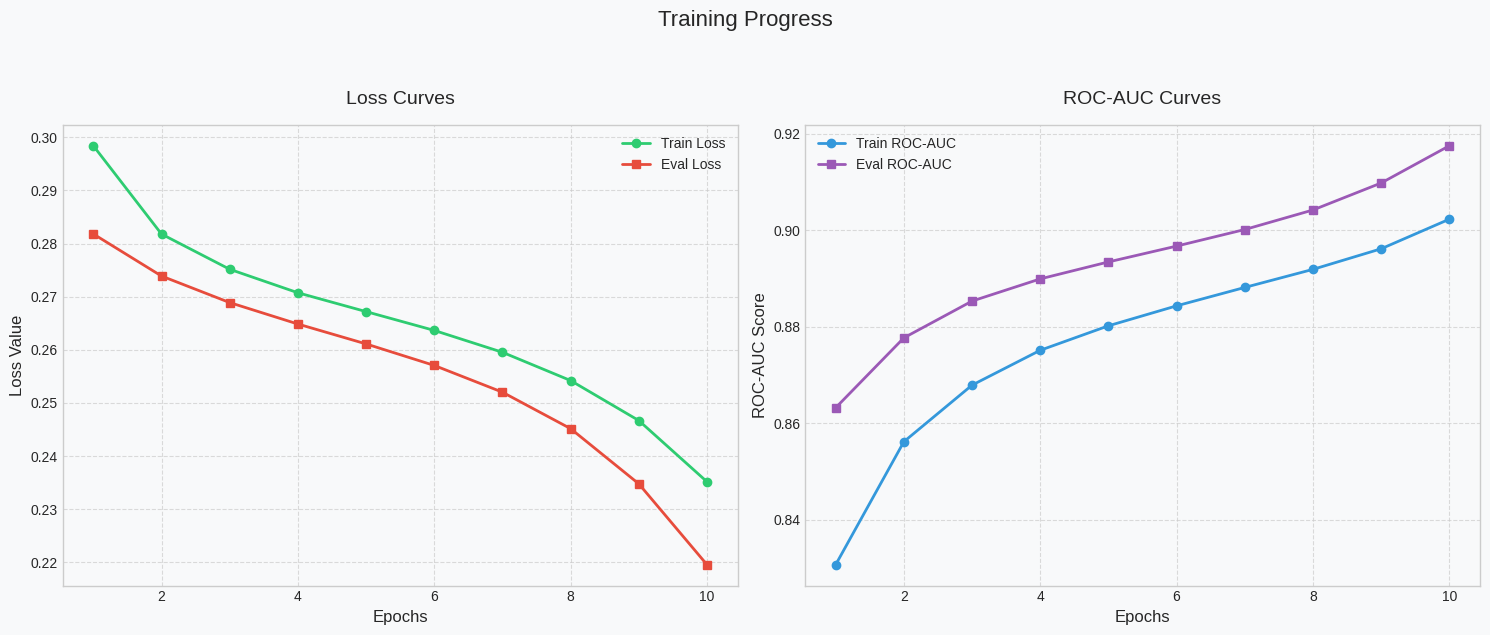

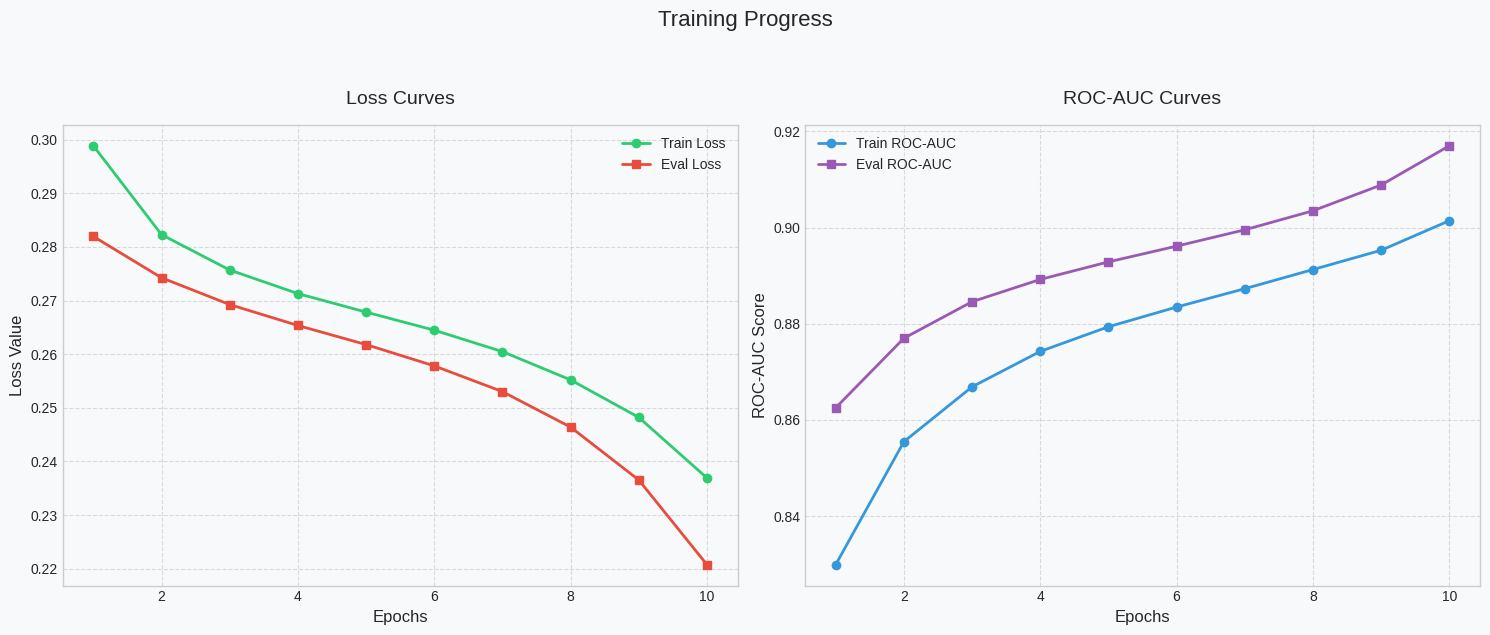

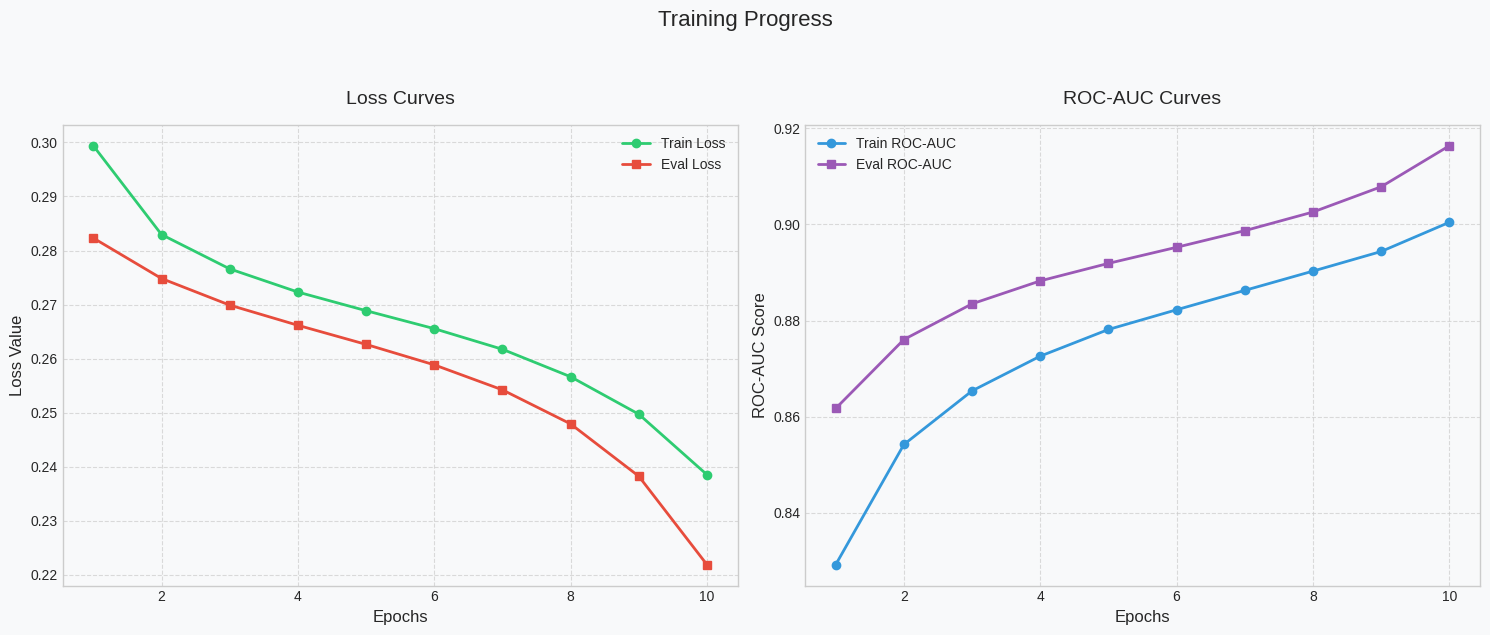

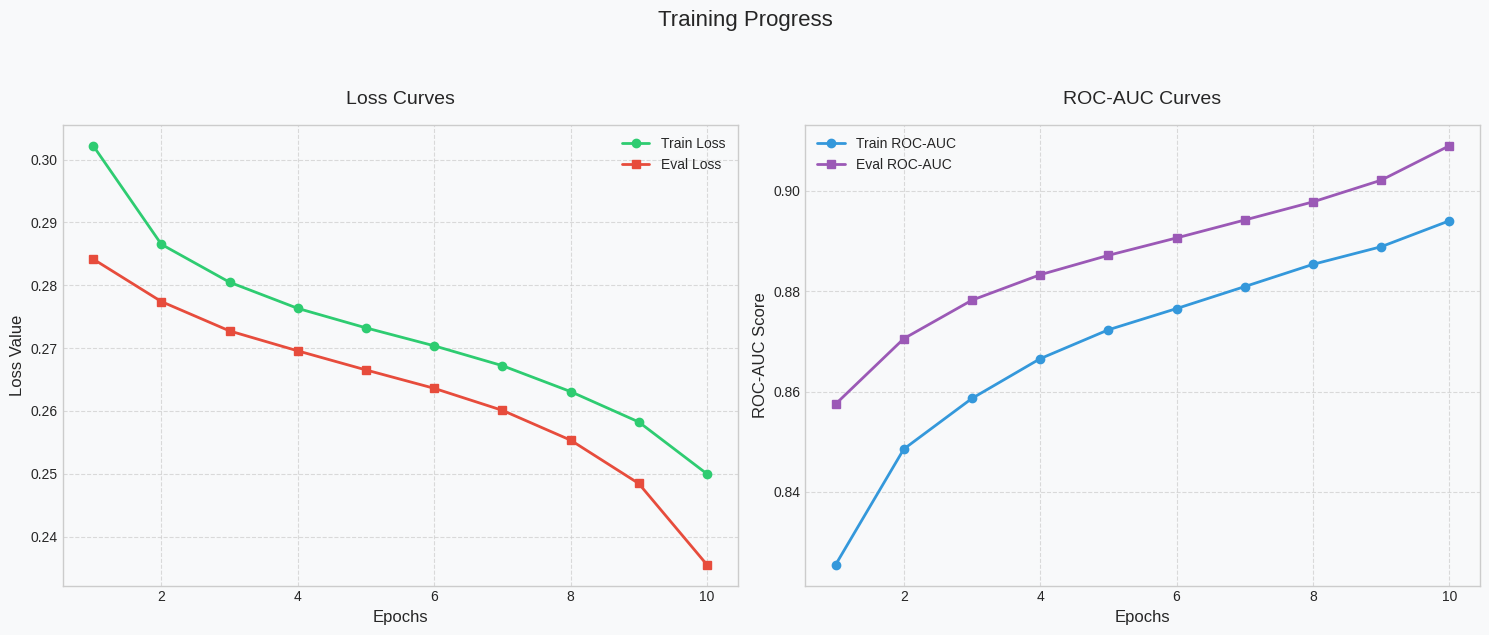

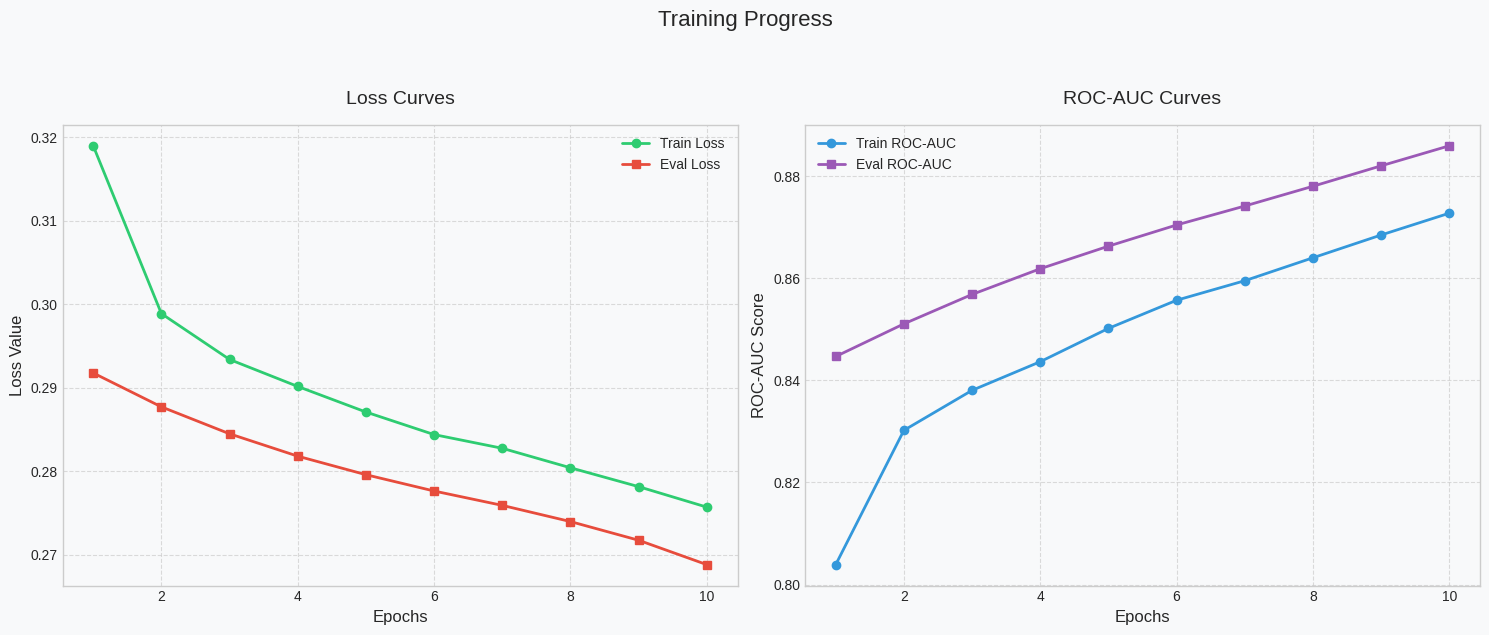

In [25]:
train_ds_4, test_ds_4 = load_loandata()

results_dicts = {}
for p in [0.01, 0.1, 0.2, 0.5, 0.9]:
    dict_sub_4 = train(train_ds_4,
                       test_ds_4,
                       model_name=FourthModel,
                       base_hidden_size=128,
                       n_epochs=10, #
                       base_dropout_p=p
                       )
    func_subplots(dict_sub_4)

# Эксперимент 5. Weight Decay, Learning Rate

In [26]:
class FifthBaseBlock(nn.Module):
    def __init__(self, hidden_size=128, dropout_p=0.0):
        super().__init__()
        self.bn = nn.BatchNorm1d(hidden_size)
        self.fc1 = nn.Linear(hidden_size, hidden_size*4)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_p)
        self.fc2 = nn.Linear(hidden_size*4, hidden_size)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x_skip = x
        x = self.bn(x) # Batch Norms
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x + x_skip # Skip Connections

class FifthModel(nn.Module):
    def __init__(self, hidden_size=128, dropout_p=0.0):
        super().__init__()

        self.emb_person_home_ownership = nn.Embedding(4, embedding_dim=hidden_size)
        self.emb_loan_intent = nn.Embedding(6, embedding_dim=hidden_size)
        self.emb_loan_grade = nn.Embedding(7, embedding_dim=hidden_size)
        self.emb_cb_person_default_on_file = nn.Embedding(2, embedding_dim=hidden_size)

        self.numeric_linear = nn.Linear(7, hidden_size)

        self.block1 = FifthBaseBlock(hidden_size, dropout_p)
        self.block2 = FifthBaseBlock(hidden_size, dropout_p)
        self.block3 = FifthBaseBlock(hidden_size, dropout_p)

        self.linear_out = nn.Linear(hidden_size, 1)

    def forward(self, cat_features: dict[str, Tensor], numeric_features: dict[str, Tensor]) -> Tensor:
        x_person_home_ownership = self.emb_person_home_ownership(cat_features['person_home_ownership'])
        x_loan_intent = self.emb_loan_intent(cat_features['loan_intent'])
        x_loan_grade = self.emb_loan_grade(cat_features['loan_grade'])
        x_cb_person_default_on_file = self.emb_cb_person_default_on_file(cat_features['cb_person_default_on_file'])

        stacked_numeric = torch.stack([numeric_features['person_age'],
                                       numeric_features['person_income'],
                                       numeric_features['person_emp_length'],
                                       numeric_features['loan_amnt'],
                                       numeric_features['loan_int_rate'],
                                       numeric_features['loan_percent_income'],
                                       numeric_features['cb_person_cred_hist_length']
                                       ], dim=-1)

        x_numeric = self.numeric_linear(stacked_numeric)
        x = x_person_home_ownership + x_loan_intent + x_loan_grade + x_cb_person_default_on_file + x_numeric

        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)

        x = self.linear_out(x)
        return x.squeeze(-1)



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Result with wd=0.1 and lr=0.01


 10%|█         | 1/10 [00:27<04:09, 27.70s/it]

Epoch 1/10, Train Loss: 0.3183, Test Loss: 0.3307, Train ROC-AUC: 0.8131, Test ROC-AUC: 0.8303


 20%|██        | 2/10 [00:54<03:39, 27.39s/it]

Epoch 2/10, Train Loss: 0.3521, Test Loss: 0.3673, Train ROC-AUC: 0.8104, Test ROC-AUC: 0.8212


 30%|███       | 3/10 [01:22<03:11, 27.40s/it]

Epoch 3/10, Train Loss: 0.3727, Test Loss: 0.3761, Train ROC-AUC: 0.8072, Test ROC-AUC: 0.8181


 40%|████      | 4/10 [01:49<02:43, 27.32s/it]

Epoch 4/10, Train Loss: 0.3771, Test Loss: 0.3779, Train ROC-AUC: 0.8035, Test ROC-AUC: 0.8157


 50%|█████     | 5/10 [02:17<02:18, 27.64s/it]

Epoch 5/10, Train Loss: 0.3780, Test Loss: 0.3777, Train ROC-AUC: 0.8035, Test ROC-AUC: 0.8153


 50%|█████     | 5/10 [02:44<02:44, 32.97s/it]

Early stopping triggered after 6 epochs



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Result with wd=0.1 and lr=0.05


 10%|█         | 1/10 [00:27<04:04, 27.16s/it]

Epoch 1/10, Train Loss: 0.3608, Test Loss: 0.3773, Train ROC-AUC: 0.7886, Test ROC-AUC: 0.8141


 20%|██        | 2/10 [00:54<03:37, 27.21s/it]

Epoch 2/10, Train Loss: 0.3787, Test Loss: 0.3774, Train ROC-AUC: 0.7942, Test ROC-AUC: 0.8139


 30%|███       | 3/10 [01:21<03:10, 27.25s/it]

Epoch 3/10, Train Loss: 0.3787, Test Loss: 0.3774, Train ROC-AUC: 0.7942, Test ROC-AUC: 0.8139


 40%|████      | 4/10 [01:49<02:45, 27.56s/it]

Epoch 4/10, Train Loss: 0.3787, Test Loss: 0.3774, Train ROC-AUC: 0.7942, Test ROC-AUC: 0.8139


 50%|█████     | 5/10 [02:16<02:17, 27.42s/it]

Epoch 5/10, Train Loss: 0.3784, Test Loss: 0.3785, Train ROC-AUC: 0.7985, Test ROC-AUC: 0.8141


 50%|█████     | 5/10 [02:44<02:44, 32.82s/it]

Early stopping triggered after 6 epochs
Result with wd=0.1 and lr=0.1



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
 10%|█         | 1/10 [00:27<04:03, 27.10s/it]

Epoch 1/10, Train Loss: 0.3707, Test Loss: 0.3755, Train ROC-AUC: 0.7833, Test ROC-AUC: 0.8142


 20%|██        | 2/10 [00:54<03:36, 27.12s/it]

Epoch 2/10, Train Loss: 0.3791, Test Loss: 0.3755, Train ROC-AUC: 0.7873, Test ROC-AUC: 0.8142


 30%|███       | 3/10 [01:22<03:12, 27.43s/it]

Epoch 3/10, Train Loss: 0.3791, Test Loss: 0.3755, Train ROC-AUC: 0.7873, Test ROC-AUC: 0.8142


 40%|████      | 4/10 [01:48<02:42, 27.13s/it]

Epoch 4/10, Train Loss: 0.3791, Test Loss: 0.3755, Train ROC-AUC: 0.7873, Test ROC-AUC: 0.8142


 50%|█████     | 5/10 [02:15<02:15, 27.05s/it]

Epoch 5/10, Train Loss: 0.3786, Test Loss: 0.3774, Train ROC-AUC: 0.7943, Test ROC-AUC: 0.8139


 50%|█████     | 5/10 [02:43<02:43, 32.65s/it]

Early stopping triggered after 6 epochs



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Result with wd=0.01 and lr=0.01


 10%|█         | 1/10 [00:27<04:08, 27.59s/it]

Epoch 1/10, Train Loss: 0.2983, Test Loss: 0.2818, Train ROC-AUC: 0.8308, Test ROC-AUC: 0.8633


 20%|██        | 2/10 [00:55<03:44, 28.06s/it]

Epoch 2/10, Train Loss: 0.2817, Test Loss: 0.2738, Train ROC-AUC: 0.8562, Test ROC-AUC: 0.8778


 30%|███       | 3/10 [01:23<03:14, 27.74s/it]

Epoch 3/10, Train Loss: 0.2751, Test Loss: 0.2688, Train ROC-AUC: 0.8680, Test ROC-AUC: 0.8854


 40%|████      | 4/10 [01:50<02:45, 27.61s/it]

Epoch 4/10, Train Loss: 0.2707, Test Loss: 0.2648, Train ROC-AUC: 0.8752, Test ROC-AUC: 0.8900


 50%|█████     | 5/10 [02:18<02:17, 27.49s/it]

Epoch 5/10, Train Loss: 0.2671, Test Loss: 0.2610, Train ROC-AUC: 0.8803, Test ROC-AUC: 0.8936


 60%|██████    | 6/10 [02:46<01:50, 27.71s/it]

Epoch 6/10, Train Loss: 0.2635, Test Loss: 0.2570, Train ROC-AUC: 0.8845, Test ROC-AUC: 0.8968


 70%|███████   | 7/10 [03:13<01:22, 27.64s/it]

Epoch 7/10, Train Loss: 0.2594, Test Loss: 0.2519, Train ROC-AUC: 0.8883, Test ROC-AUC: 0.9002


 80%|████████  | 8/10 [03:40<00:54, 27.48s/it]

Epoch 8/10, Train Loss: 0.2541, Test Loss: 0.2450, Train ROC-AUC: 0.8920, Test ROC-AUC: 0.9043


 90%|█████████ | 9/10 [04:07<00:27, 27.38s/it]

Epoch 9/10, Train Loss: 0.2465, Test Loss: 0.2346, Train ROC-AUC: 0.8963, Test ROC-AUC: 0.9099


100%|██████████| 10/10 [04:35<00:00, 27.52s/it]

Epoch 10/10, Train Loss: 0.2350, Test Loss: 0.2195, Train ROC-AUC: 0.9025, Test ROC-AUC: 0.9176



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Result with wd=0.01 and lr=0.05


 10%|█         | 1/10 [00:28<04:14, 28.24s/it]

Epoch 1/10, Train Loss: 0.2901, Test Loss: 0.2702, Train ROC-AUC: 0.8434, Test ROC-AUC: 0.8866


 20%|██        | 2/10 [00:55<03:42, 27.77s/it]

Epoch 2/10, Train Loss: 0.2630, Test Loss: 0.2400, Train ROC-AUC: 0.8821, Test ROC-AUC: 0.9084


 30%|███       | 3/10 [01:23<03:13, 27.58s/it]

Epoch 3/10, Train Loss: 0.2363, Test Loss: 0.2270, Train ROC-AUC: 0.9002, Test ROC-AUC: 0.9166


 40%|████      | 4/10 [01:50<02:45, 27.51s/it]

Epoch 4/10, Train Loss: 0.2335, Test Loss: 0.2226, Train ROC-AUC: 0.9015, Test ROC-AUC: 0.9166


 50%|█████     | 5/10 [02:18<02:17, 27.55s/it]

Epoch 5/10, Train Loss: 0.2334, Test Loss: 0.2254, Train ROC-AUC: 0.9016, Test ROC-AUC: 0.9140


 60%|██████    | 6/10 [02:45<01:50, 27.65s/it]

Epoch 6/10, Train Loss: 0.2338, Test Loss: 0.2247, Train ROC-AUC: 0.9015, Test ROC-AUC: 0.9127


 70%|███████   | 7/10 [03:12<01:22, 27.46s/it]

Epoch 7/10, Train Loss: 0.2338, Test Loss: 0.2235, Train ROC-AUC: 0.9011, Test ROC-AUC: 0.9119


 80%|████████  | 8/10 [03:39<00:54, 27.28s/it]

Epoch 8/10, Train Loss: 0.2261, Test Loss: 0.2104, Train ROC-AUC: 0.9062, Test ROC-AUC: 0.9172


 90%|█████████ | 9/10 [04:06<00:27, 27.22s/it]

Epoch 9/10, Train Loss: 0.2276, Test Loss: 0.2115, Train ROC-AUC: 0.9054, Test ROC-AUC: 0.9155


100%|██████████| 10/10 [04:34<00:00, 27.41s/it]

Epoch 10/10, Train Loss: 0.2287, Test Loss: 0.2109, Train ROC-AUC: 0.9044, Test ROC-AUC: 0.9156



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Result with wd=0.01 and lr=0.1


 10%|█         | 1/10 [00:27<04:08, 27.63s/it]

Epoch 1/10, Train Loss: 0.2884, Test Loss: 0.2564, Train ROC-AUC: 0.8473, Test ROC-AUC: 0.9001


 20%|██        | 2/10 [00:54<03:37, 27.25s/it]

Epoch 2/10, Train Loss: 0.2447, Test Loss: 0.2384, Train ROC-AUC: 0.8939, Test ROC-AUC: 0.9101


 30%|███       | 3/10 [01:21<03:10, 27.16s/it]

Epoch 3/10, Train Loss: 0.2411, Test Loss: 0.2375, Train ROC-AUC: 0.8958, Test ROC-AUC: 0.9066


 40%|████      | 4/10 [01:48<02:42, 27.10s/it]

Epoch 4/10, Train Loss: 0.2413, Test Loss: 0.2389, Train ROC-AUC: 0.8955, Test ROC-AUC: 0.9068


 50%|█████     | 5/10 [02:15<02:14, 26.99s/it]

Epoch 5/10, Train Loss: 0.2411, Test Loss: 0.2388, Train ROC-AUC: 0.8954, Test ROC-AUC: 0.9027


 60%|██████    | 6/10 [02:43<01:48, 27.20s/it]

Epoch 6/10, Train Loss: 0.2411, Test Loss: 0.2382, Train ROC-AUC: 0.8955, Test ROC-AUC: 0.9033


 70%|███████   | 7/10 [03:10<01:21, 27.16s/it]

Epoch 7/10, Train Loss: 0.2320, Test Loss: 0.2225, Train ROC-AUC: 0.9016, Test ROC-AUC: 0.9106


 80%|████████  | 8/10 [03:37<00:54, 27.29s/it]

Epoch 8/10, Train Loss: 0.2333, Test Loss: 0.2237, Train ROC-AUC: 0.9009, Test ROC-AUC: 0.9101


 90%|█████████ | 9/10 [04:05<00:27, 27.53s/it]

Epoch 9/10, Train Loss: 0.2334, Test Loss: 0.2238, Train ROC-AUC: 0.9009, Test ROC-AUC: 0.9091


100%|██████████| 10/10 [04:34<00:00, 27.43s/it]

Epoch 10/10, Train Loss: 0.2336, Test Loss: 0.2225, Train ROC-AUC: 0.9007, Test ROC-AUC: 0.9091



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Result with wd=0.001 and lr=0.01


 10%|█         | 1/10 [00:27<04:09, 27.76s/it]

Epoch 1/10, Train Loss: 0.2966, Test Loss: 0.2786, Train ROC-AUC: 0.8332, Test ROC-AUC: 0.8723


 20%|██        | 2/10 [00:55<03:44, 28.04s/it]

Epoch 2/10, Train Loss: 0.2747, Test Loss: 0.2673, Train ROC-AUC: 0.8660, Test ROC-AUC: 0.8919


 30%|███       | 3/10 [01:23<03:15, 27.92s/it]

Epoch 3/10, Train Loss: 0.2630, Test Loss: 0.2581, Train ROC-AUC: 0.8805, Test ROC-AUC: 0.8981


 40%|████      | 4/10 [01:51<02:47, 28.00s/it]

Epoch 4/10, Train Loss: 0.2540, Test Loss: 0.2498, Train ROC-AUC: 0.8879, Test ROC-AUC: 0.9020


 50%|█████     | 5/10 [02:19<02:19, 27.98s/it]

Epoch 5/10, Train Loss: 0.2465, Test Loss: 0.2419, Train ROC-AUC: 0.8931, Test ROC-AUC: 0.9057


 60%|██████    | 6/10 [02:47<01:51, 27.82s/it]

Epoch 6/10, Train Loss: 0.2398, Test Loss: 0.2349, Train ROC-AUC: 0.8975, Test ROC-AUC: 0.9093


 70%|███████   | 7/10 [03:14<01:22, 27.57s/it]

Epoch 7/10, Train Loss: 0.2339, Test Loss: 0.2289, Train ROC-AUC: 0.9013, Test ROC-AUC: 0.9124


 80%|████████  | 8/10 [03:41<00:55, 27.52s/it]

Epoch 8/10, Train Loss: 0.2292, Test Loss: 0.2240, Train ROC-AUC: 0.9044, Test ROC-AUC: 0.9149


 90%|█████████ | 9/10 [04:09<00:27, 27.73s/it]

Epoch 9/10, Train Loss: 0.2257, Test Loss: 0.2207, Train ROC-AUC: 0.9066, Test ROC-AUC: 0.9165


100%|██████████| 10/10 [04:37<00:00, 27.74s/it]

Epoch 10/10, Train Loss: 0.2232, Test Loss: 0.2187, Train ROC-AUC: 0.9082, Test ROC-AUC: 0.9176
Result with wd=0.001 and lr=0.05



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
 10%|█         | 1/10 [00:27<04:04, 27.21s/it]

Epoch 1/10, Train Loss: 0.2885, Test Loss: 0.2696, Train ROC-AUC: 0.8481, Test ROC-AUC: 0.8896


 20%|██        | 2/10 [00:54<03:37, 27.17s/it]

Epoch 2/10, Train Loss: 0.2564, Test Loss: 0.2432, Train ROC-AUC: 0.8839, Test ROC-AUC: 0.9062


 30%|███       | 3/10 [01:22<03:11, 27.39s/it]

Epoch 3/10, Train Loss: 0.2395, Test Loss: 0.2286, Train ROC-AUC: 0.8970, Test ROC-AUC: 0.9142


 40%|████      | 4/10 [01:49<02:45, 27.56s/it]

Epoch 4/10, Train Loss: 0.2301, Test Loss: 0.2212, Train ROC-AUC: 0.9033, Test ROC-AUC: 0.9180


 50%|█████     | 5/10 [02:16<02:17, 27.42s/it]

Epoch 5/10, Train Loss: 0.2237, Test Loss: 0.2158, Train ROC-AUC: 0.9072, Test ROC-AUC: 0.9204


 60%|██████    | 6/10 [02:43<01:48, 27.21s/it]

Epoch 6/10, Train Loss: 0.2187, Test Loss: 0.2113, Train ROC-AUC: 0.9101, Test ROC-AUC: 0.9219


 70%|███████   | 7/10 [03:10<01:21, 27.16s/it]

Epoch 7/10, Train Loss: 0.2151, Test Loss: 0.2081, Train ROC-AUC: 0.9122, Test ROC-AUC: 0.9230


 80%|████████  | 8/10 [03:37<00:54, 27.10s/it]

Epoch 8/10, Train Loss: 0.2123, Test Loss: 0.2058, Train ROC-AUC: 0.9139, Test ROC-AUC: 0.9239


 90%|█████████ | 9/10 [04:06<00:27, 27.49s/it]

Epoch 9/10, Train Loss: 0.2101, Test Loss: 0.2040, Train ROC-AUC: 0.9153, Test ROC-AUC: 0.9248


100%|██████████| 10/10 [04:33<00:00, 27.37s/it]

Epoch 10/10, Train Loss: 0.2084, Test Loss: 0.2022, Train ROC-AUC: 0.9165, Test ROC-AUC: 0.9255



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Result with wd=0.001 and lr=0.1


 10%|█         | 1/10 [00:27<04:06, 27.39s/it]

Epoch 1/10, Train Loss: 0.2944, Test Loss: 0.2590, Train ROC-AUC: 0.8456, Test ROC-AUC: 0.8930


 20%|██        | 2/10 [00:54<03:38, 27.33s/it]

Epoch 2/10, Train Loss: 0.2480, Test Loss: 0.2265, Train ROC-AUC: 0.8902, Test ROC-AUC: 0.9137


 30%|███       | 3/10 [01:21<03:10, 27.25s/it]

Epoch 3/10, Train Loss: 0.2289, Test Loss: 0.2170, Train ROC-AUC: 0.9031, Test ROC-AUC: 0.9181


 40%|████      | 4/10 [01:49<02:44, 27.39s/it]

Epoch 4/10, Train Loss: 0.2206, Test Loss: 0.2125, Train ROC-AUC: 0.9080, Test ROC-AUC: 0.9200


 50%|█████     | 5/10 [02:15<02:15, 27.06s/it]

Epoch 5/10, Train Loss: 0.2162, Test Loss: 0.2093, Train ROC-AUC: 0.9109, Test ROC-AUC: 0.9220


 60%|██████    | 6/10 [02:42<01:47, 26.98s/it]

Epoch 6/10, Train Loss: 0.2132, Test Loss: 0.2070, Train ROC-AUC: 0.9128, Test ROC-AUC: 0.9237


 70%|███████   | 7/10 [03:09<01:20, 26.87s/it]

Epoch 7/10, Train Loss: 0.2110, Test Loss: 0.2053, Train ROC-AUC: 0.9145, Test ROC-AUC: 0.9250


 80%|████████  | 8/10 [03:36<00:53, 26.83s/it]

Epoch 8/10, Train Loss: 0.2091, Test Loss: 0.2037, Train ROC-AUC: 0.9160, Test ROC-AUC: 0.9263


 90%|█████████ | 9/10 [04:03<00:26, 26.87s/it]

Epoch 9/10, Train Loss: 0.2078, Test Loss: 0.2022, Train ROC-AUC: 0.9171, Test ROC-AUC: 0.9273


100%|██████████| 10/10 [04:36<00:00, 27.61s/it]

Epoch 10/10, Train Loss: 0.2069, Test Loss: 0.2011, Train ROC-AUC: 0.9178, Test ROC-AUC: 0.9280


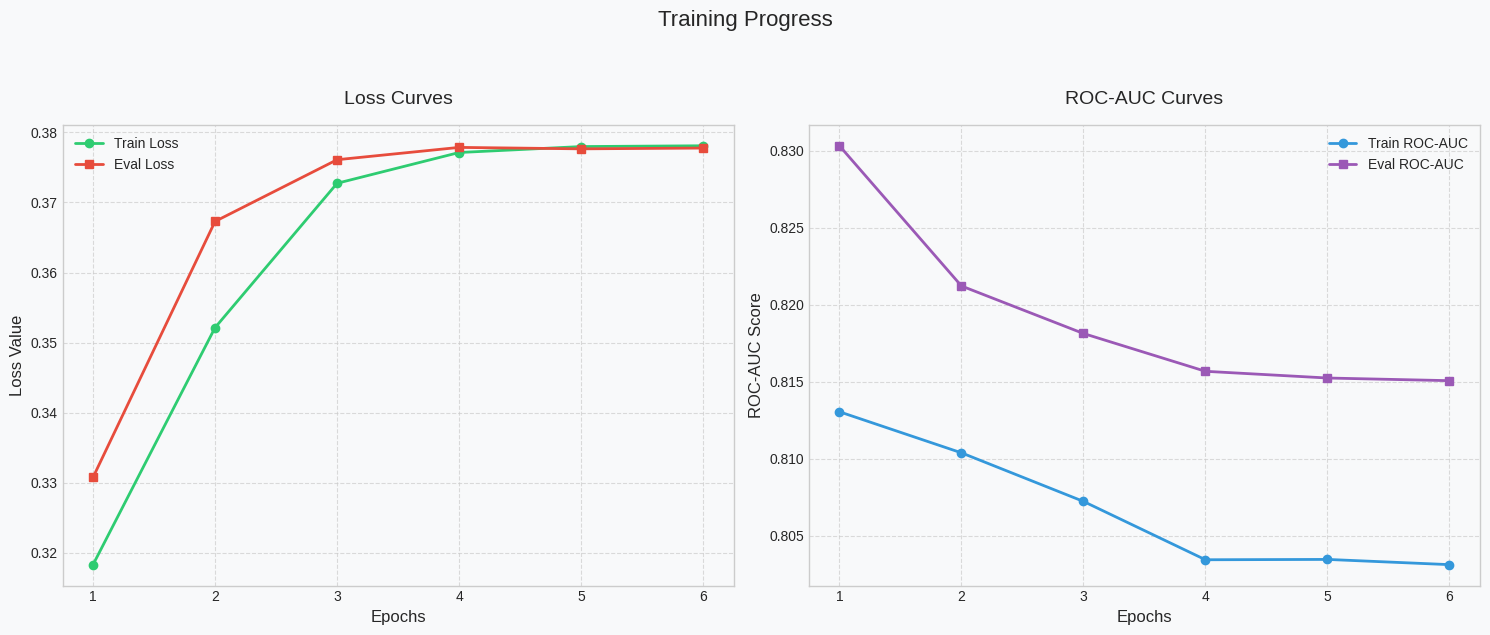

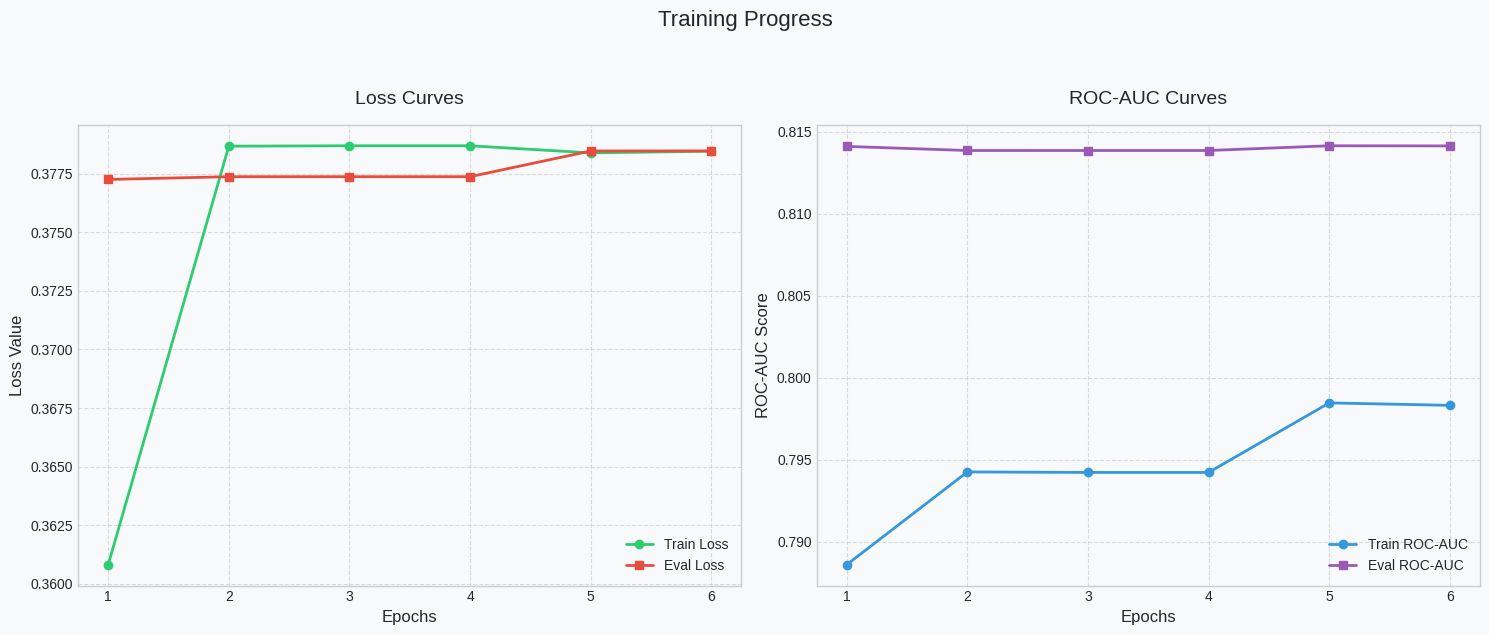

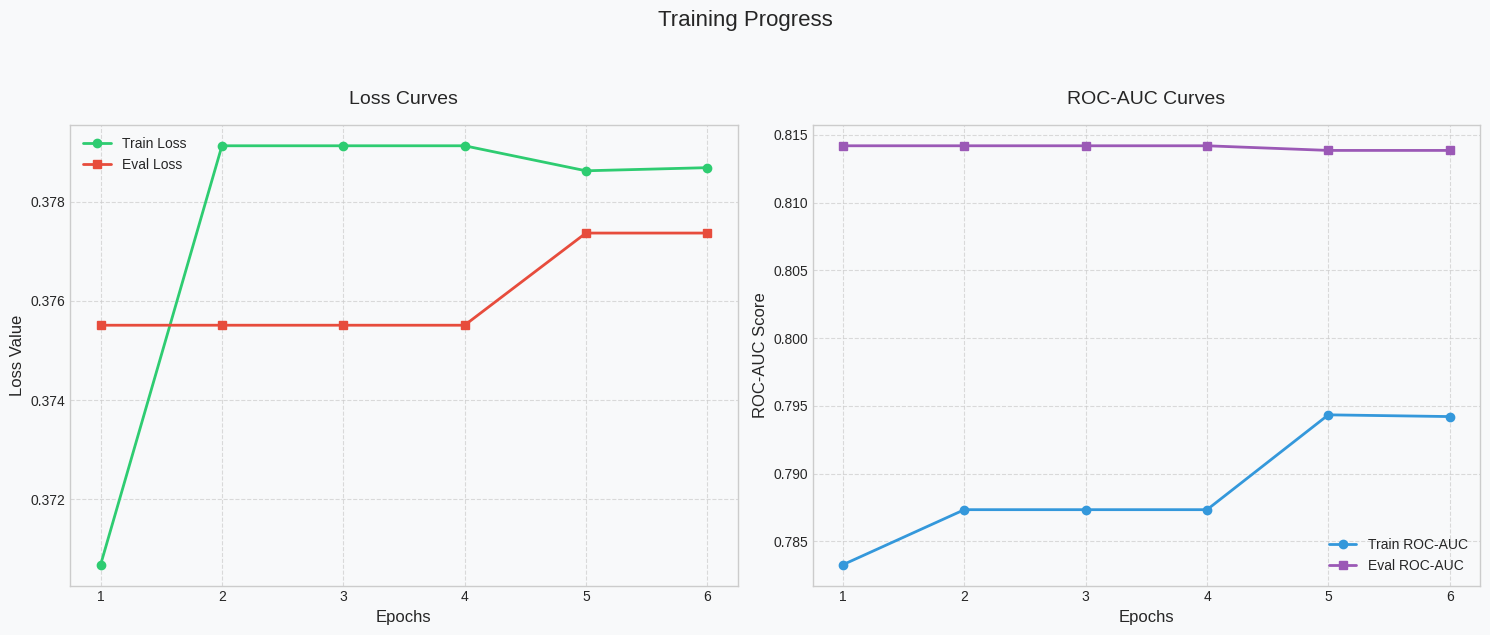

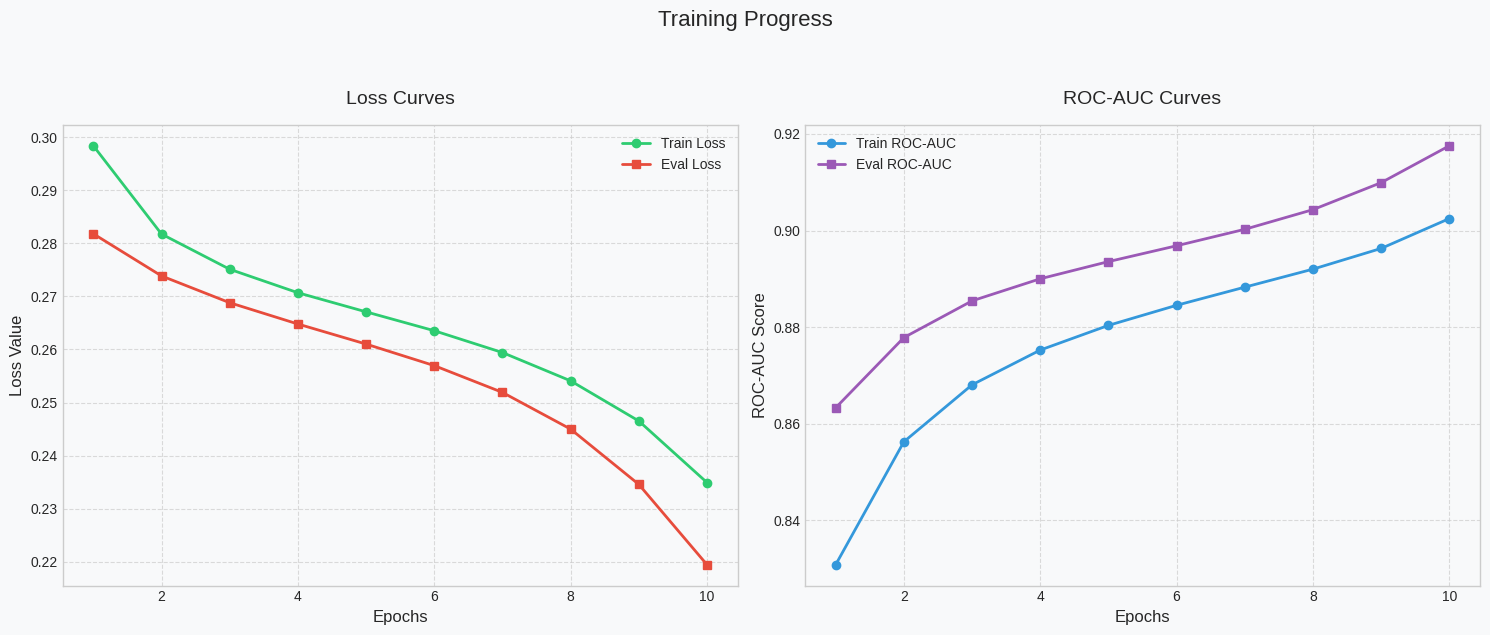

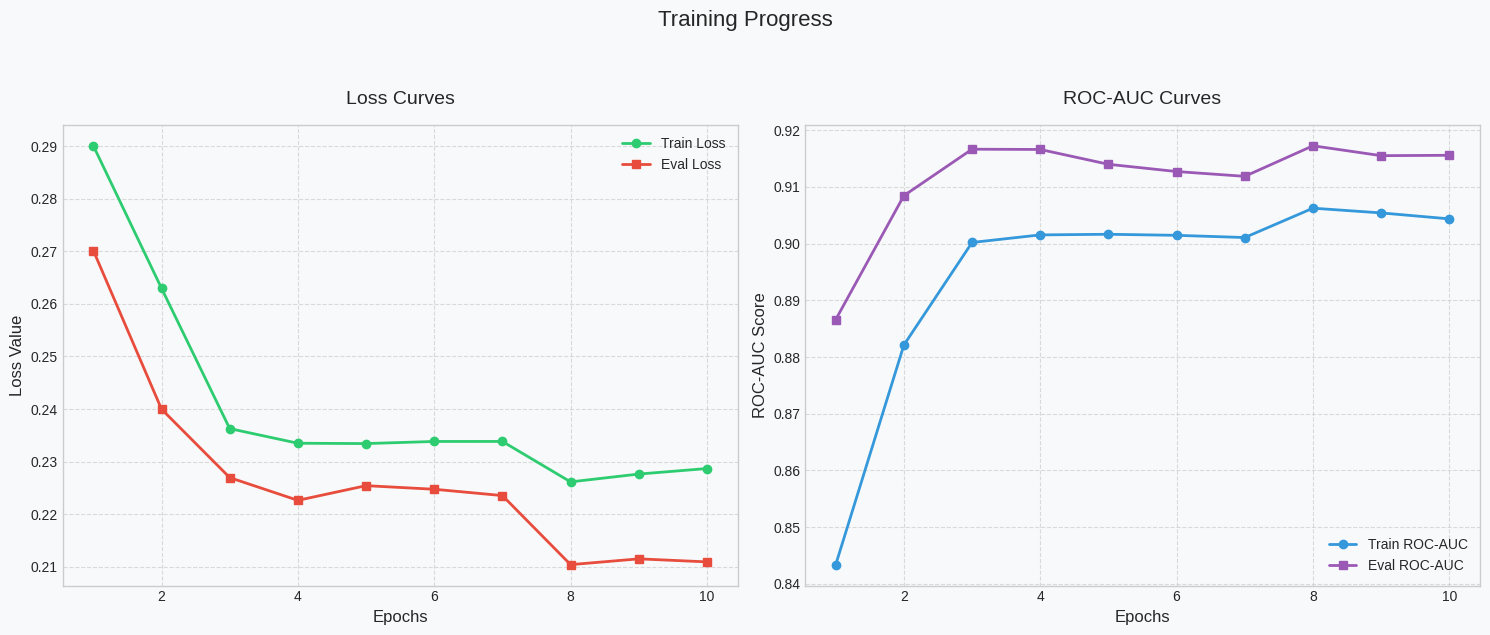

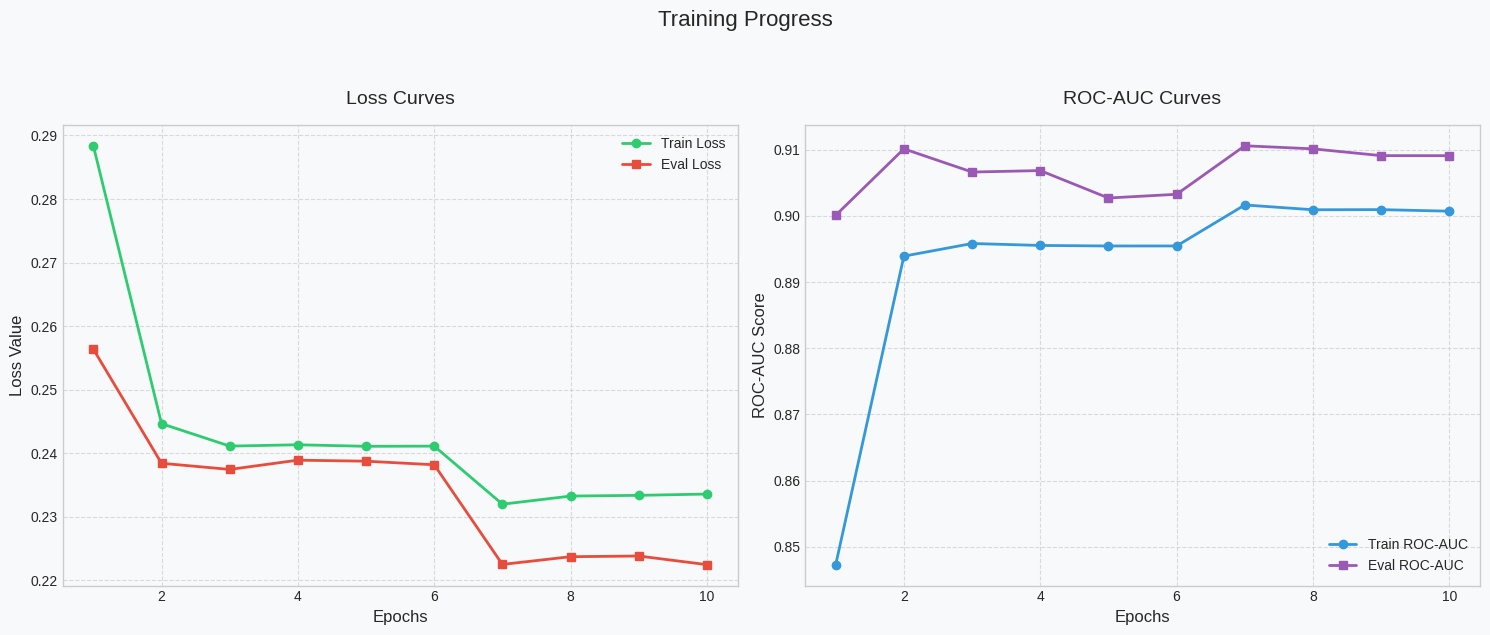

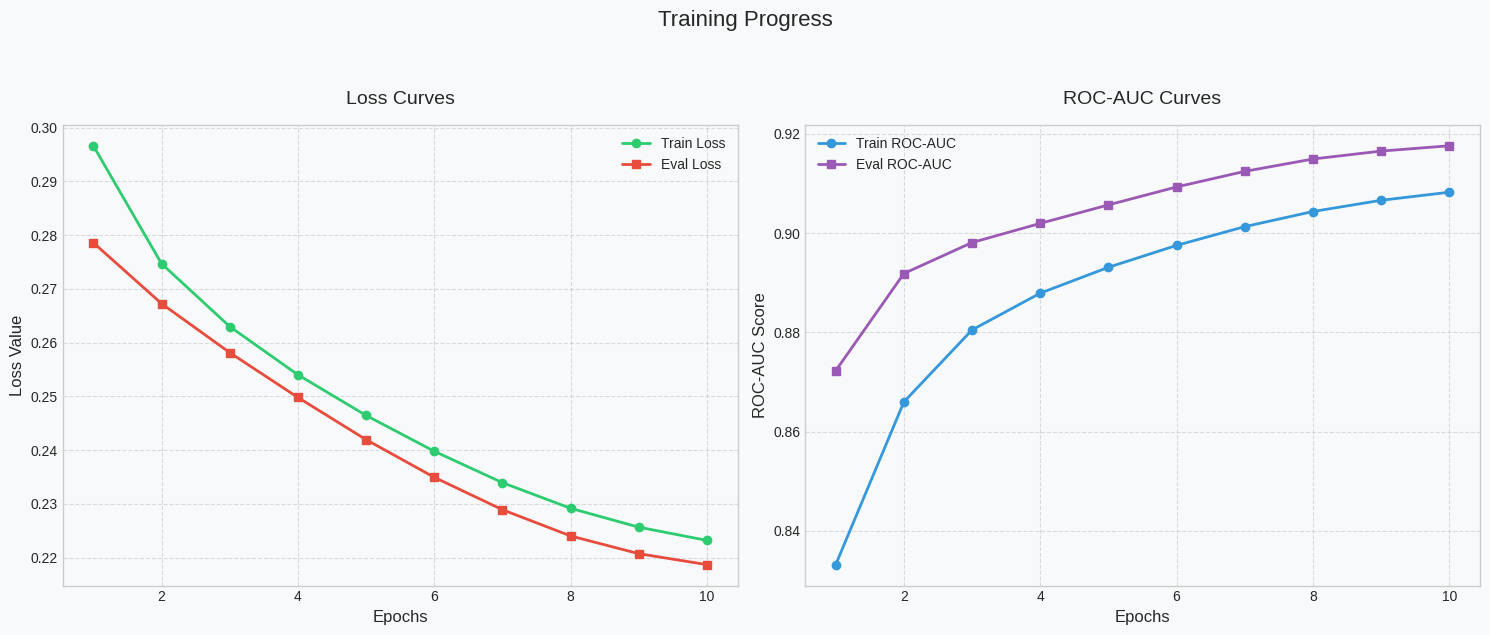

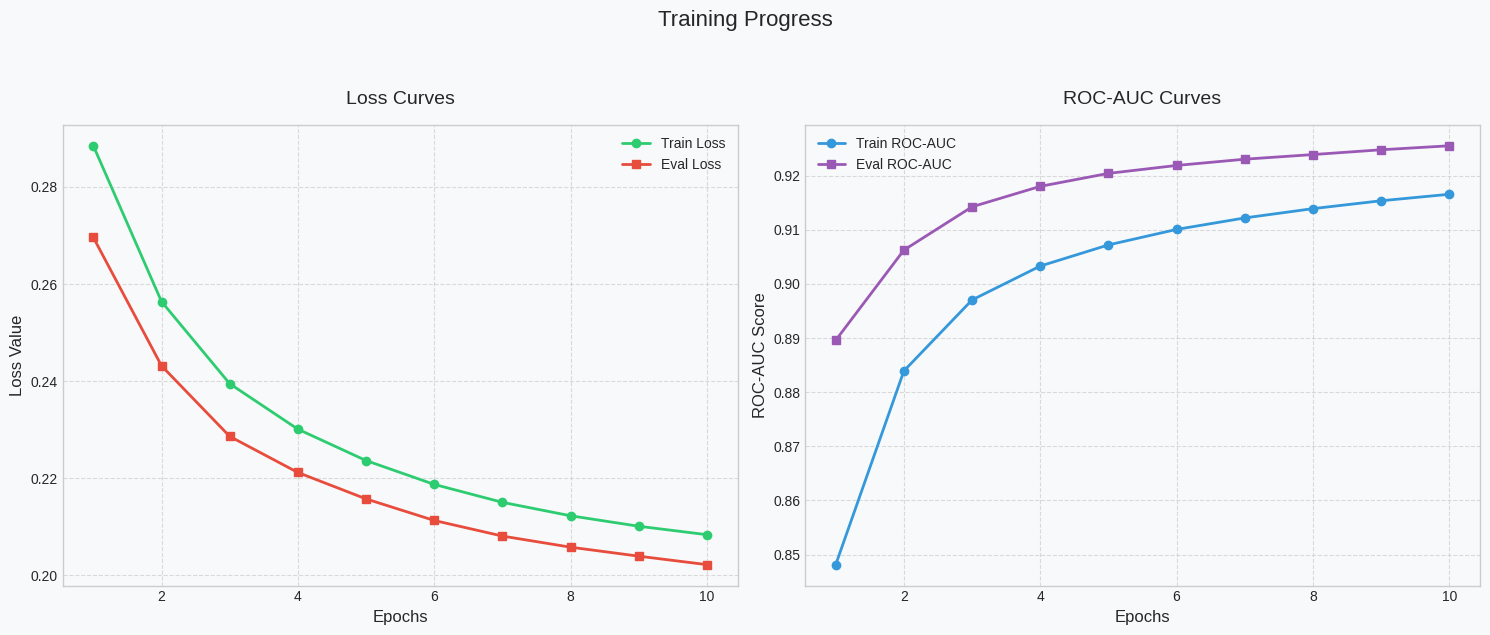

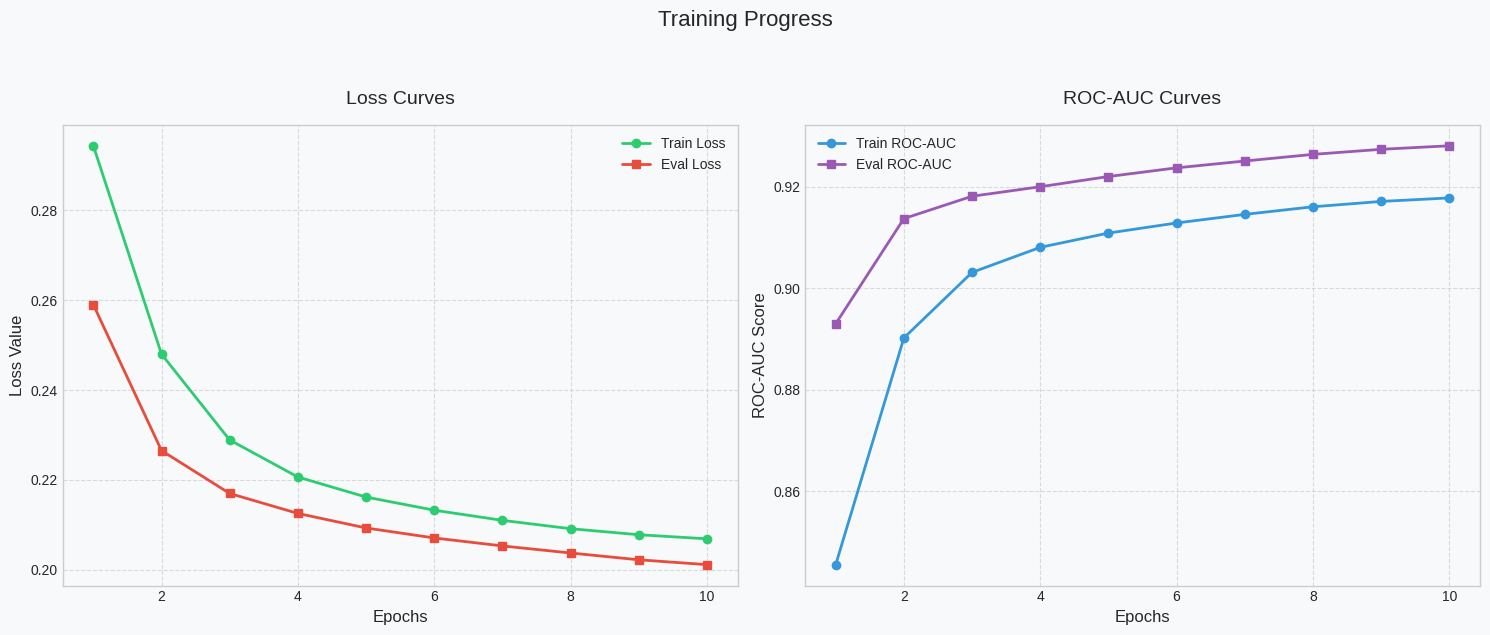

In [27]:
train_ds_5, test_ds_5 = load_loandata()

weight_decay = [0.1, 0.01, 0.001]
learning_rate = [0.01, 0.05, 0.1]

for wd in weight_decay:
  for lr in learning_rate:
    print(f"Result with wd={wd} and lr={lr}")
    dict_sub_5 = train(train_ds_5,
                       test_ds_5,
                       model_name=FifthModel,
                       base_hidden_size=128,
                       n_epochs=10, #
                       base_dropout_p=0.0,
                       base_weight_decay=wd,
                       base_lr=lr
                       )
    func_subplots(dict_sub_5)